<a href="https://colab.research.google.com/github/Rahul786Patidar/Pharmaceutical-Sales-prediction-/blob/main/Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
from tensorflow.keras.layers import Dense,RepeatVector,LSTM,Dropout
from tensorflow.keras.layers import Flatten,Conv1D,MaxPool1D
from tensorflow.keras.layers import Bidirectional,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

In [3]:
train_data= pd.read_csv("/content/drive/MyDrive/DIGICHROME/train.csv",low_memory=False)
store_data= pd.read_csv("/content/drive/MyDrive/DIGICHROME/store.csv",low_memory=False)

In [4]:
train_data.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [5]:
train_data.describe()

Store     DayOfWeek         Sales     Customers          Open  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01   
std    3.219087e+02  1.997391e+00  3.849926e+03  4.644117e+02  3.755392e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.800000e+02  2.000000e+00  3.727000e+03  4.050000e+02  1.000000e+00   
50%    5.580000e+02  4.000000e+00  5.744000e+03  6.090000e+02  1.000000e+00   
75%    8.380000e+02  6.000000e+00  7.856000e+03  8.370000e+02  1.000000e+00   
max    1.115000e+03  7.000000e+00  4.155100e+04  7.388000e+03  1.000000e+00   

              Promo  SchoolHoliday  
count  1.017209e+06   1.017209e+06  
mean   3.815145e-01   1.786467e-01  
std    4.857586e-01   3.830564e-01  
min    0.000000e+00   0.000000e+00  
25%    0.000000e+00   0.000000e+00  
50%    0.000000e+00   0.000000e+00  
75%    1.000000e+00   0.000000e+00  
max    1.000000e+00   1.000000e+00

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [7]:
train_data['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [8]:
train_data['Date'].unique()

array(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
       '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
       '2015-07-23', '2015-07-22', '2015-07-21', '2015-07-20',
       '2015-07-19', '2015-07-18', '2015-07-17', '2015-07-16',
       '2015-07-15', '2015-07-14', '2015-07-13', '2015-07-12',
       '2015-07-11', '2015-07-10', '2015-07-09', '2015-07-08',
       '2015-07-07', '2015-07-06', '2015-07-05', '2015-07-04',
       '2015-07-03', '2015-07-02', '2015-07-01', '2015-06-30',
       '2015-06-29', '2015-06-28', '2015-06-27', '2015-06-26',
       '2015-06-25', '2015-06-24', '2015-06-23', '2015-06-22',
       '2015-06-21', '2015-06-20', '2015-06-19', '2015-06-18',
       '2015-06-17', '2015-06-16', '2015-06-15', '2015-06-14',
       '2015-06-13', '2015-06-12', '2015-06-11', '2015-06-10',
       '2015-06-09', '2015-06-08', '2015-06-07', '2015-06-06',
       '2015-06-05', '2015-06-04', '2015-06-03', '2015-06-02',
       '2015-06-01', '2015-05-31', '2015-05-30', '2015-

In [9]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [10]:
store_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [11]:
store_data.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

In [12]:
#store dataset fill into null values
store_data['CompetitionDistance'] = store_data['CompetitionDistance'].fillna(0)
store_data['CompetitionOpenSinceMonth'] = store_data['CompetitionOpenSinceMonth'].fillna(0)
store_data['CompetitionOpenSinceYear'] = store_data['CompetitionOpenSinceYear'].fillna(0)
store_data['Promo2SinceWeek'] = store_data['Promo2SinceWeek'].fillna(0)
store_data['Promo2SinceYear'] = store_data['Promo2SinceYear'].fillna(0)
store_data['PromoInterval'] = store_data['PromoInterval'].fillna(0)

In [13]:
store_data.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [14]:
store_data

Store StoreType Assortment  CompetitionDistance  \
0         1         c          a               1270.0   
1         2         a          a                570.0   
2         3         a          a              14130.0   
3         4         c          c                620.0   
4         5         a          a              29910.0   
...     ...       ...        ...                  ...   
1110   1111         a          a               1900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                           9.0                    2008.0       0   
1                          11.0                    2007.0       1   
2                          12.0                    2006.0       1   
3                           9.0                    2009.0       0   
4                           4.0                    2015.0       0   
...                         ...                       ...     ...   
1110                        6.0                    2014.0       1   
1111                        4.0                    2006.0       0   
1112                        0.0                       0.0       0   
1113                        0.0                       0.0       0   
1114                        0.0                       0.0       1   

      Promo2SinceWeek  Promo2SinceYear     PromoInterval  
0                 0.0              0.0                 0  
1                13.0           2010.0   Jan,Apr,Jul,Oct  
2                14.0           2011.0   Jan,Apr,Jul,Oct  
3                 0.0              0.0                 0  
4                 0.0              0.0                 0  
...               ...              ...               ...  
1110             31.0           2013.0   Jan,Apr,Jul,Oct  
1111              0.0              0.0                 0  
1112              0.0              0.0                 0  
1113              0.0              0.0                 0  
1114             22.0           2012.0  Mar,Jun,Sept,Dec  

[1115 rows x 10 columns]

In [15]:
train_score = pd.merge(train_data,store_data,on='Store',how='left')
train_score

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0            1          5  2015-07-31   5263        555     1      1   
1            2          5  2015-07-31   6064        625     1      1   
2            3          5  2015-07-31   8314        821     1      1   
3            4          5  2015-07-31  13995       1498     1      1   
4            5          5  2015-07-31   4822        559     1      1   
...        ...        ...         ...    ...        ...   ...    ...   
1017204   1111          2  2013-01-01      0          0     0      0   
1017205   1112          2  2013-01-01      0          0     0      0   
1017206   1113          2  2013-01-01      0          0     0      0   
1017207   1114          2  2013-01-01      0          0     0      0   
1017208   1115          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
0                  0              1         c          a               1270.0   
1                  0              1         a          a                570.0   
2                  0              1         a          a              14130.0   
3                  0              1         c          c                620.0   
4                  0              1         a          a              29910.0   
...              ...            ...       ...        ...                  ...   
1017204            a              1         a          a               1900.0   
1017205            a              1         c          c               1880.0   
1017206            a              1         a          c               9260.0   
1017207            a              1         a          c                870.0   
1017208            a              1         d          c               5350.0   

         CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                              9.0                    2008.0       0   
1                             11.0                    2007.0       1   
2                             12.0                    2006.0       1   
3                              9.0                    2009.0       0   
4                              4.0                    2015.0       0   
...                            ...                       ...     ...   
1017204                        6.0                    2014.0       1   
1017205                        4.0                    2006.0       0   
1017206                        0.0                       0.0       0   
1017207                        0.0                       0.0       0   
1017208                        0.0                       0.0       1   

         Promo2SinceWeek  Promo2SinceYear     PromoInterval  
0                    0.0              0.0                 0  
1                   13.0           2010.0   Jan,Apr,Jul,Oct  
2                   14.0           2011.0   Jan,Apr,Jul,Oct  
3                    0.0              0.0                 0  
4                    0.0              0.0                 0  
...                  ...              ...               ...  
1017204             31.0           2013.0   Jan,Apr,Jul,Oct  
1017205              0.0              0.0                 0  
1017206              0.0              0.0                 0  
1017207              0.0              0.0                 0  
1017208             22.0           2012.0  Mar,Jun,Sept,Dec  

[1017209 rows x 18 columns]

In [16]:
#change data types object to int
train_score.loc[train_score['StateHoliday']=='0','StateHoliday'] = 0
train_score.loc[train_score['StateHoliday']=='a','StateHoliday'] = 1
train_score.loc[train_score['StateHoliday']=='b','StateHoliday'] = 2
train_score.loc[train_score['StateHoliday']=='c','StateHoliday'] = 3
#store the value with same column name

train_score['StateHoliday'] = train_score['StateHoliday'].astype(int,copy=False)

In [17]:
train_score.loc[train_score['Assortment']=='a','Assortment'] = 0
train_score.loc[train_score['Assortment']=='b','Assortment'] = 1
train_score.loc[train_score['Assortment']=='c','Assortment'] = 2

train_score['Assortment'] = train_score['Assortment'].astype(int,copy=False)

In [18]:

train_score.loc[train_score['StoreType']=='a','StoreType'] = 0
train_score.loc[train_score['StoreType']=='b','StoreType'] = 1
train_score.loc[train_score['StoreType']=='c','StoreType'] = 2
train_score.loc[train_score['StoreType']=='d','StoreType'] = 3

train_score['StoreType'] = train_score['StoreType'].astype(int,copy=False)

In [19]:
train_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  int64  
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  int64  
 10  Assortment                 1017209 non-null  int64  
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [20]:

train_score['Sales'].value_counts()

0        172871
5674        215
5558        197
5483        196
6214        195
          ...  
23806         1
24183         1
20651         1
25083         1
23303         1
Name: Sales, Length: 21734, dtype: int64

In [21]:
# code for changing format of data from object to datetime
train_score['Date'] = pd.to_datetime(train_score['Date'],format = '%Y-%m-%d')

In [22]:
train_score['CompetitionOpenSinceMonth'] = pd.DatetimeIndex(train_data['Date']).month

In [23]:
#code for change float into integer

train_score['CompetitionOpenSinceYear'] = train_score['CompetitionOpenSinceYear'].astype(int)
train_score['Promo2SinceYear'] = train_score['Promo2SinceYear'].astype(int)

In [24]:
train_score['CompetitionDistance'] = train_score['CompetitionDistance'].astype(int)
train_score['Promo2SinceWeek'] = train_score['Promo2SinceWeek'].astype(int)

In [25]:

train_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int64         
 10  Assortment                 1017209 non-null  int64         
 11  CompetitionDistance        1017209 no

In [26]:
train_score

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0            1          5 2015-07-31   5263        555     1      1   
1            2          5 2015-07-31   6064        625     1      1   
2            3          5 2015-07-31   8314        821     1      1   
3            4          5 2015-07-31  13995       1498     1      1   
4            5          5 2015-07-31   4822        559     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1017204   1111          2 2013-01-01      0          0     0      0   
1017205   1112          2 2013-01-01      0          0     0      0   
1017206   1113          2 2013-01-01      0          0     0      0   
1017207   1114          2 2013-01-01      0          0     0      0   
1017208   1115          2 2013-01-01      0          0     0      0   

         StateHoliday  SchoolHoliday  StoreType  Assortment  \
0                   0              1          2           0   
1                   0              1          0           0   
2                   0              1          0           0   
3                   0              1          2           2   
4                   0              1          0           0   
...               ...            ...        ...         ...   
1017204             1              1          0           0   
1017205             1              1          2           2   
1017206             1              1          0           2   
1017207             1              1          0           2   
1017208             1              1          3           2   

         CompetitionDistance  CompetitionOpenSinceMonth  \
0                       1270                          7   
1                        570                          7   
2                      14130                          7   
3                        620                          7   
4                      29910                          7   
...                      ...                        ...   
1017204                 1900                          1   
1017205                 1880                          1   
1017206                 9260                          1   
1017207                  870                          1   
1017208                 5350                          1   

         CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                            2008       0                0                0   
1                            2007       1               13             2010   
2                            2006       1               14             2011   
3                            2009       0                0                0   
4                            2015       0                0                0   
...                           ...     ...              ...              ...   
1017204                      2014       1               31             2013   
1017205                      2006       0                0                0   
1017206                         0       0                0                0   
1017207                         0       0                0                0   
1017208                         0       1               22             2012   

            PromoInterval  
0                       0  
1         Jan,Apr,Jul,Oct  
2         Jan,Apr,Jul,Oct  
3                       0  
4                       0  
...                   ...  
1017204   Jan,Apr,Jul,Oct  
1017205                 0  
1017206                 0  
1017207                 0  
1017208  Mar,Jun,Sept,Dec  

[1017209 rows x 18 columns]

In [27]:
train_score[(train_score.Open ==0) & (train_score.Sales ==0)].count()[0]
#so we will drop those store which sales is 0 assuming that the stores were closed temporarilly and this will help to train the model more accuractely.

172817

In [28]:
new_data = train_score.drop(train_score[(train_score.Open == 0) & (train_score.Sales ==0)].index)

In [29]:
#In new_data dataset,column name 'PromoInterval' change into dummies it means that each new column will have a binary value (0 or 1).
train_score = pd.get_dummies(train_score,columns= ['PromoInterval'])

In [30]:
train_score

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0            1          5 2015-07-31   5263        555     1      1   
1            2          5 2015-07-31   6064        625     1      1   
2            3          5 2015-07-31   8314        821     1      1   
3            4          5 2015-07-31  13995       1498     1      1   
4            5          5 2015-07-31   4822        559     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1017204   1111          2 2013-01-01      0          0     0      0   
1017205   1112          2 2013-01-01      0          0     0      0   
1017206   1113          2 2013-01-01      0          0     0      0   
1017207   1114          2 2013-01-01      0          0     0      0   
1017208   1115          2 2013-01-01      0          0     0      0   

         StateHoliday  SchoolHoliday  StoreType  ...  CompetitionDistance  \
0                   0              1          2  ...                 1270   
1                   0              1          0  ...                  570   
2                   0              1          0  ...                14130   
3                   0              1          2  ...                  620   
4                   0              1          0  ...                29910   
...               ...            ...        ...  ...                  ...   
1017204             1              1          0  ...                 1900   
1017205             1              1          2  ...                 1880   
1017206             1              1          0  ...                 9260   
1017207             1              1          0  ...                  870   
1017208             1              1          3  ...                 5350   

         CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                                7                      2008       0   
1                                7                      2007       1   
2                                7                      2006       1   
3                                7                      2009       0   
4                                7                      2015       0   
...                            ...                       ...     ...   
1017204                          1                      2014       1   
1017205                          1                      2006       0   
1017206                          1                         0       0   
1017207                          1                         0       0   
1017208                          1                         0       1   

         Promo2SinceWeek  Promo2SinceYear  PromoInterval_0  \
0                      0                0                1   
1                     13             2010                0   
2                     14             2011                0   
3                      0                0                1   
4                      0                0                1   
...                  ...              ...              ...   
1017204               31             2013                0   
1017205                0                0                1   
1017206                0                0                1   
1017207                0                0                1   
1017208               22             2012                0   

         PromoInterval_Feb,May,Aug,Nov  PromoInterval_Jan,Apr,Jul,Oct  \
0                                    0                              0   
1                                    0                              1   
2                                    0                              1   
3                                    0                              0   
4                                    0                              0   
...                                ...                            ...   
1017204                              0                              1   
1017205                              

# Trend Analysis

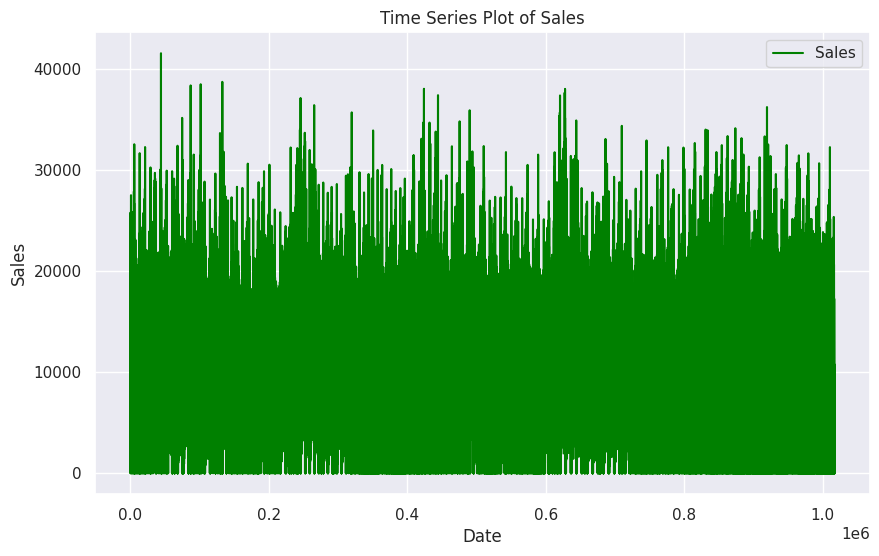

In [31]:
#plot the time series data
plt.figure(figsize=(10,6))
plt.plot(train_score['Sales'],label='Sales',color='green')
plt.title("Time Series Plot of Sales")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

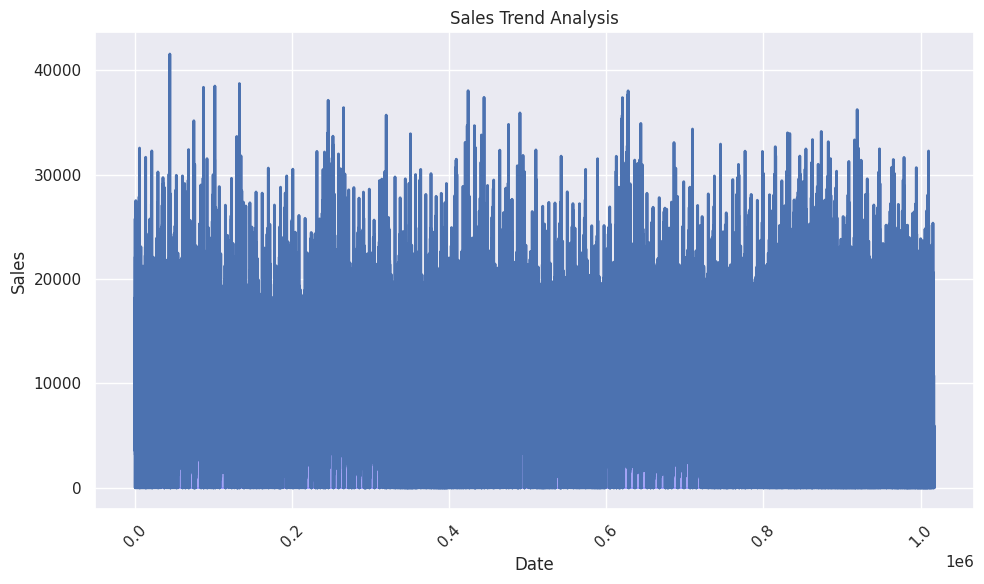

In [32]:
dates = train_score.index
sales = train_score['Sales']

plt.figure(figsize=(10,6))
plt.plot(dates,sales,linewidth=2)
plt.fill_between(dates,sales,color='blue',alpha=0.3)

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title("Sales Trend Analysis")

#plot
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
#set the Date column as the index
train_score.set_index("Date",inplace=True)

#sort the data by date
train_score.sort_index(inplace=True)

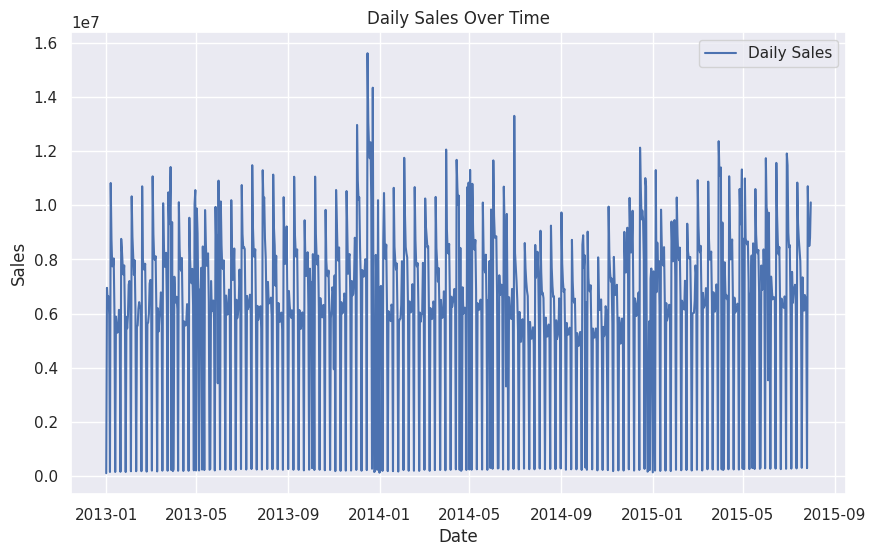

In [34]:
#Resample the data on a daily basis
daily_sales = train_score['Sales'].resample("D").sum()

#plot daily sales over time
plt.figure(figsize=(10,6))
plt.plot(daily_sales.index,daily_sales.values,label = 'Daily Sales')
plt.title("Daily Sales Over Time")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

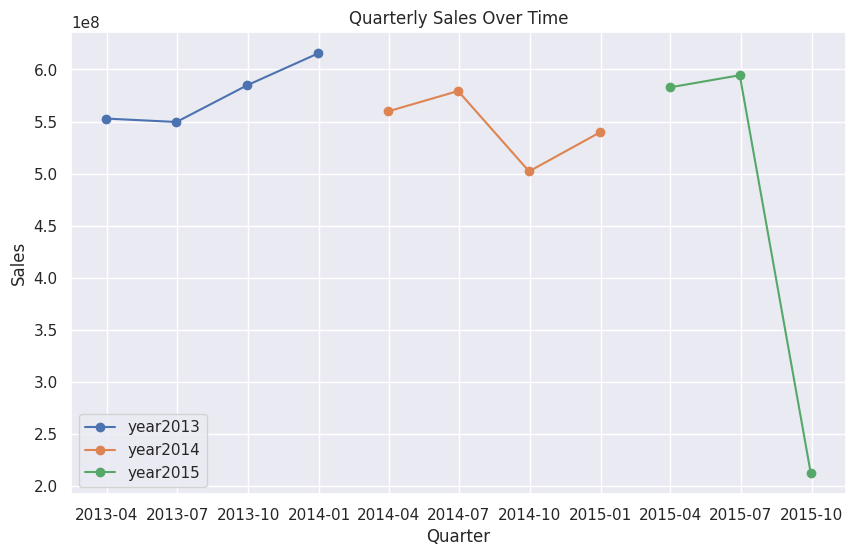

In [35]:
#Resample the data on a quarterly basis
quarterly_sales = train_score['Sales'].resample("Q").sum()

#extract years from the index
years = quarterly_sales.index.year

#plot quarterly sales over time
plt.figure(figsize=(10,6))
for year in sorted(years.unique()):
  quarterly_sales_year = quarterly_sales[years==year]
  plt.plot(quarterly_sales_year.index,quarterly_sales_year.values,marker='o',linestyle='-',label=f'year{year}')

plt.title("Quarterly Sales Over Time")
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

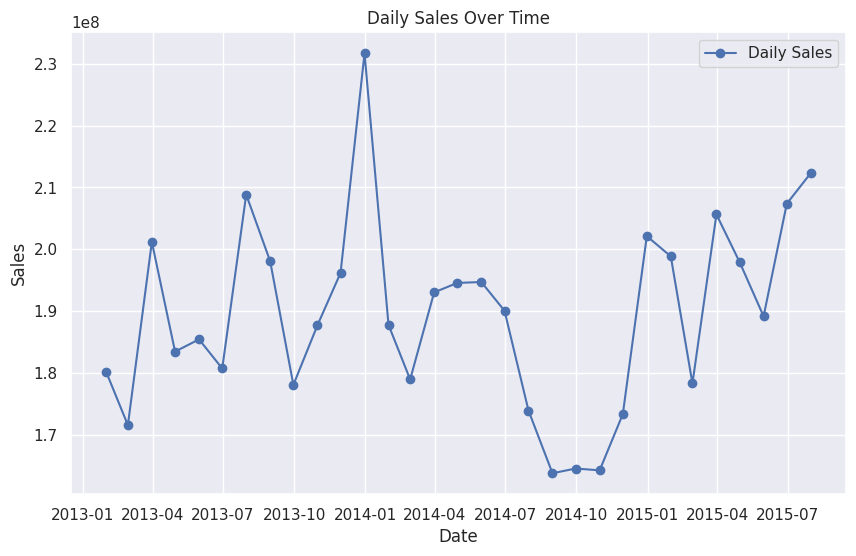

In [36]:
#Resample the data on a monthly basis
monthly_sales = train_score['Sales'].resample("M").sum()

#plot monthly sales over time
plt.figure(figsize=(10,6))
plt.plot(monthly_sales.index,monthly_sales.values,label = 'Daily Sales',marker='o',linestyle='-')
plt.title("Daily Sales Over Time")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

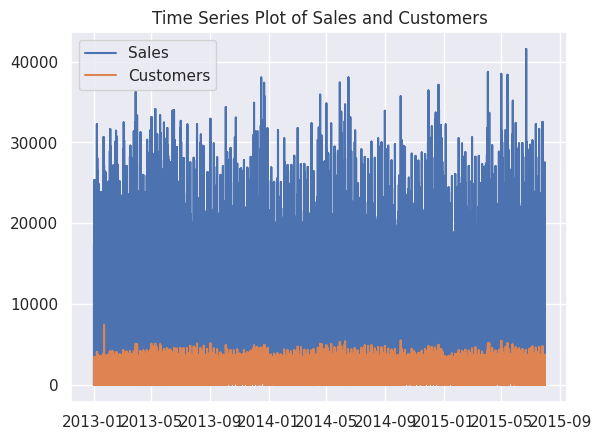

In [37]:
#Adding multiple Time series
plt.plot(train_score['Sales'],label='Sales')
plt.plot(train_score['Customers'],label='Customers')
plt.title('Time Series Plot of Sales and Customers')
plt.legend()


From the above figure we can see that the sales is constant as per the customers

# Checking the trends and seasonality in te data

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

<function matplotlib.pyplot.show(close=None, block=None)>

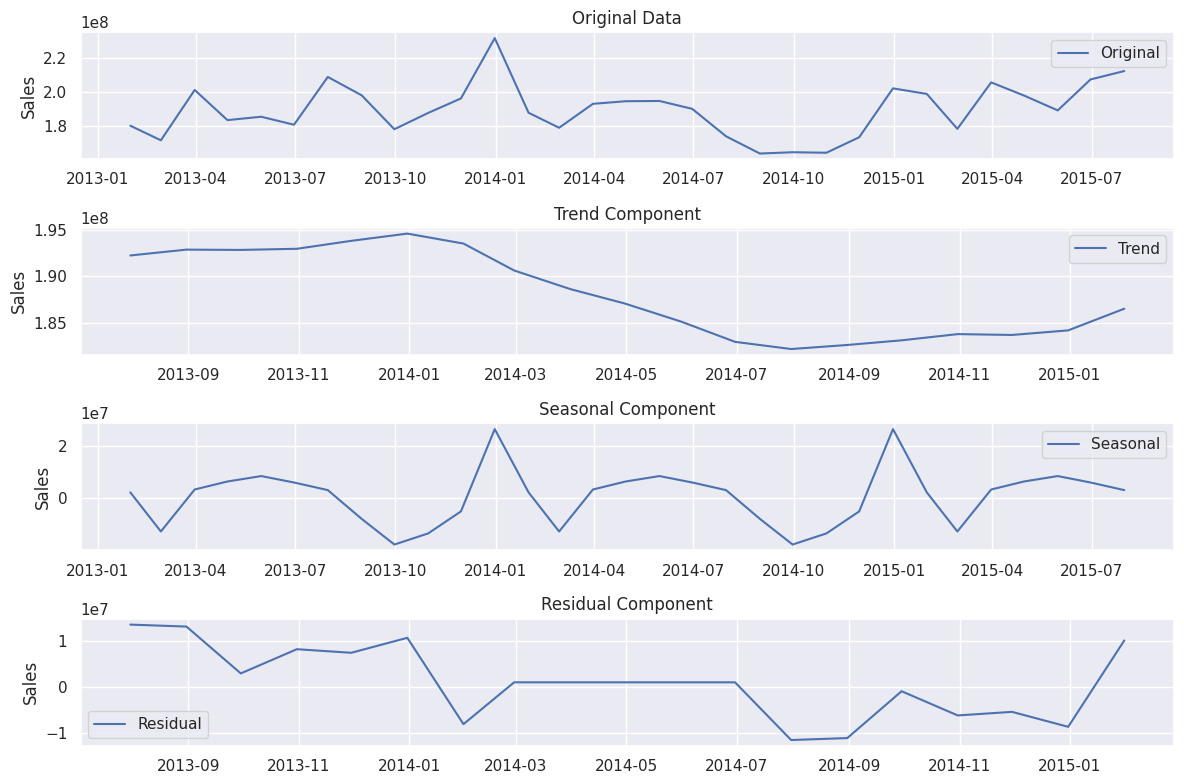

In [39]:
#Perform decomposition to check for trends and seasonality
decomposition = seasonal_decompose(monthly_sales,model='additive')

#Plot original ,trend seasonal and residual components
plt.figure(figsize=(12,8))

plt.subplot(4,1,1)
plt.plot(monthly_sales,label='Original')
plt.legend()
plt.ylabel('Sales')
plt.title('Original Data')

plt.subplot(4,1,2)
plt.plot(decomposition.trend,label='Trend')
plt.legend()
plt.ylabel('Sales')
plt.title('Trend Component')

plt.subplot(4,1,3)
plt.plot(decomposition.seasonal,label='Seasonal')
plt.legend()
plt.ylabel('Sales')
plt.title('Seasonal Component')

plt.subplot(4,1,4)
plt.plot(decomposition.resid,label='Residual')
plt.legend()
plt.ylabel('Sales')
plt.title('Residual Component')

plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

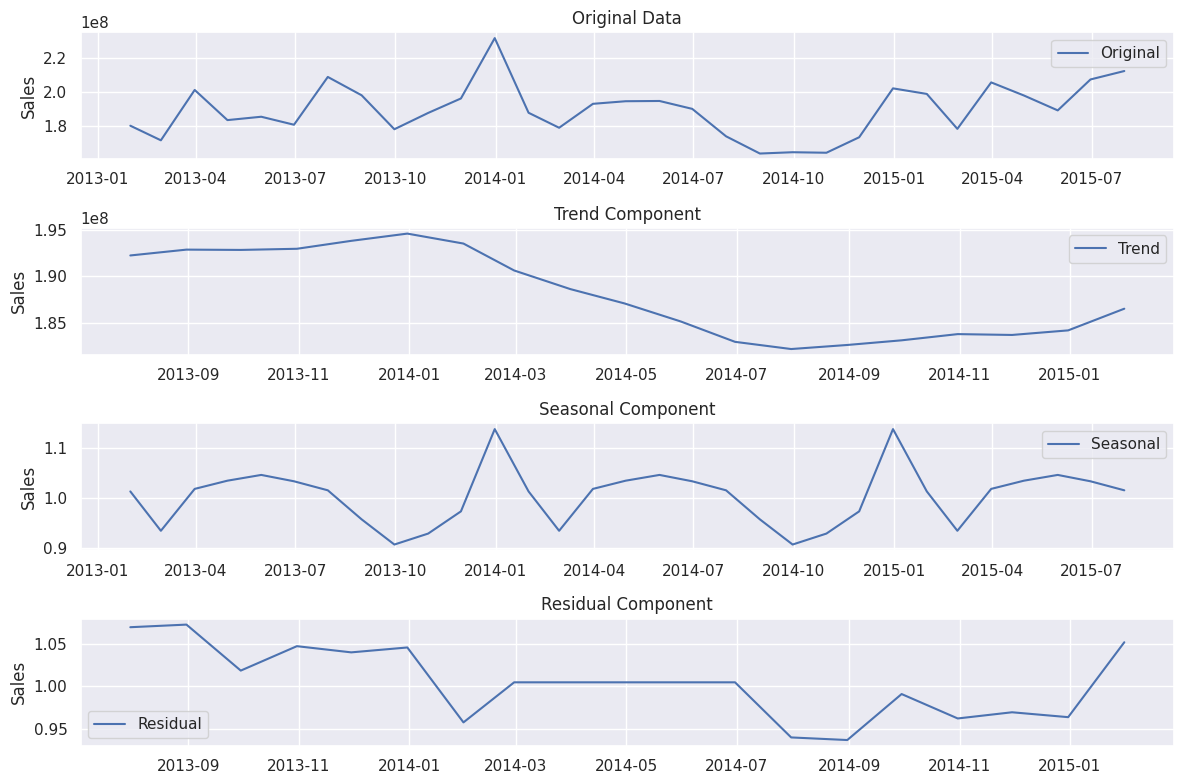

In [40]:
#Perform decomposition to check for trends and seasonality
decomposition = seasonal_decompose(monthly_sales,model='multiplicative')

#Plot original ,trend seasonal and residual components
plt.figure(figsize=(12,8))

plt.subplot(4,1,1)
plt.plot(monthly_sales,label='Original')
plt.legend()
plt.ylabel('Sales')
plt.title('Original Data')

plt.subplot(4,1,2)
plt.plot(decomposition.trend,label='Trend')
plt.legend()
plt.ylabel('Sales')
plt.title('Trend Component')

plt.subplot(4,1,3)
plt.plot(decomposition.seasonal,label='Seasonal')
plt.legend()
plt.ylabel('Sales')
plt.title('Seasonal Component')

plt.subplot(4,1,4)
plt.plot(decomposition.resid,label='Residual')
plt.legend()
plt.ylabel('Sales')
plt.title('Residual Component')

plt.tight_layout()
plt.show

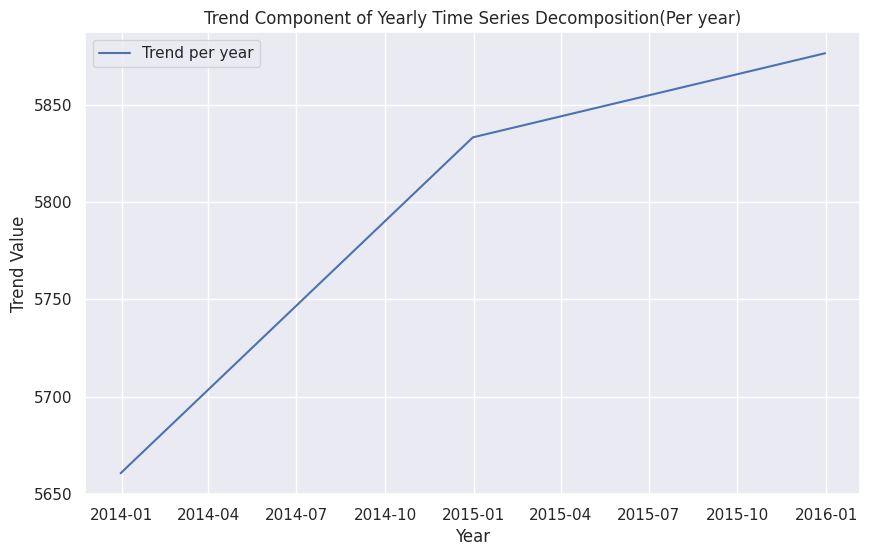

In [41]:
decomposition_result = seasonal_decompose(train_score['Sales'],model='additive',period=365)
trend_data = decomposition_result.trend

#Grouping trend data by year and calculate mean
trend_data_per_year = trend_data.resample('Y').mean()

#Plot the trend component per year
plt.figure(figsize=(10,6))
plt.plot(trend_data_per_year.index,trend_data_per_year,label='Trend per year')
plt.title('Trend Component of Yearly Time Series Decomposition(Per year)')
plt.xlabel('Year')
plt.ylabel('Trend Value')
plt.legend()
plt.show()

<Figure size 3000x1000 with 0 Axes>

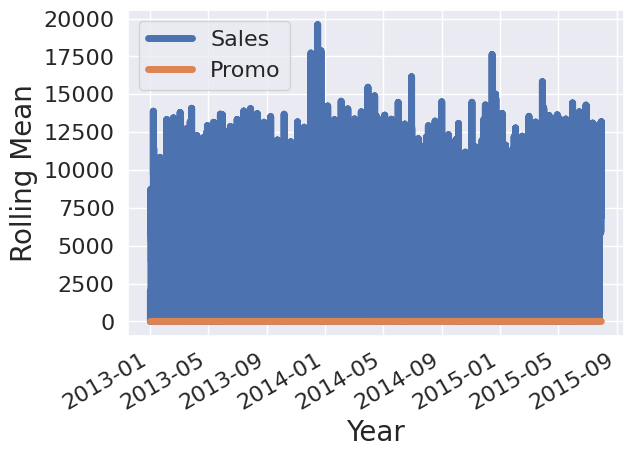

In [42]:
#choose the columns for which you want to calculate the rolling mean
selected_columns=['Sales','Promo'] #Replace with actual data mean

#calculate the rolling mean with a window size of 12 months
rolling_means = train_score[selected_columns].rolling(window=12).mean()

#plot the rolling mean of the selected columns
plt.figure(figsize=(30,10))
rolling_means.plot(linewidth=5,fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Rolling Mean',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)
plt.show()

# Resampled time series

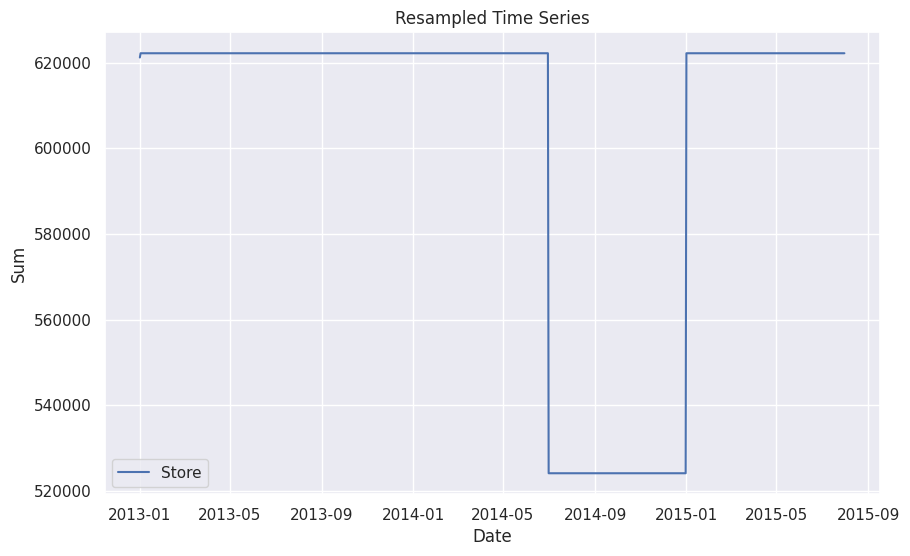

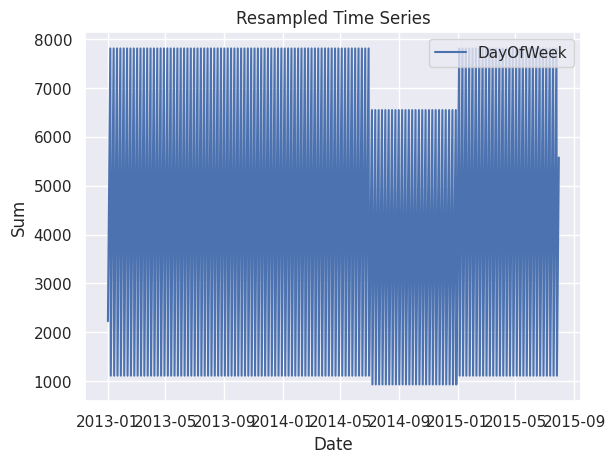

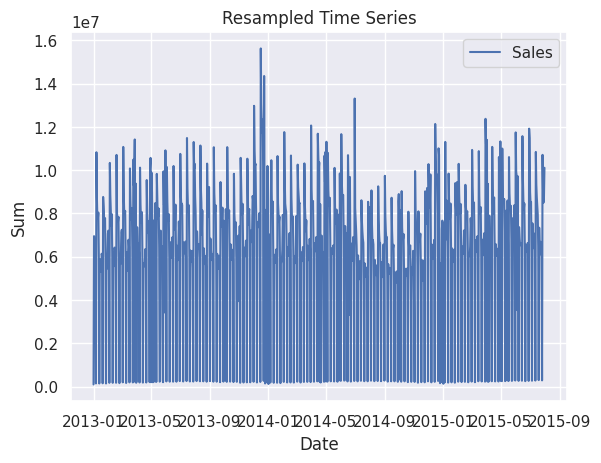

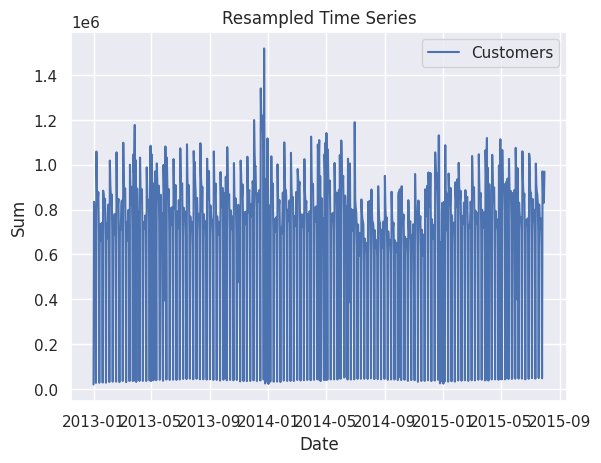

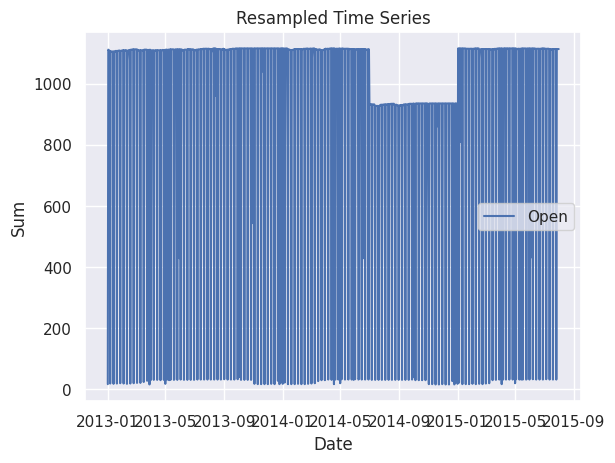

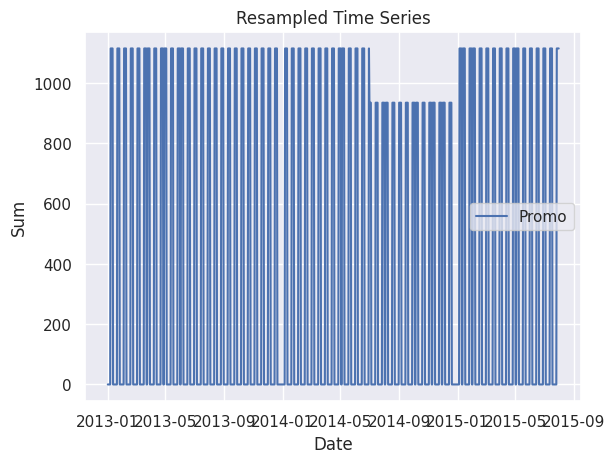

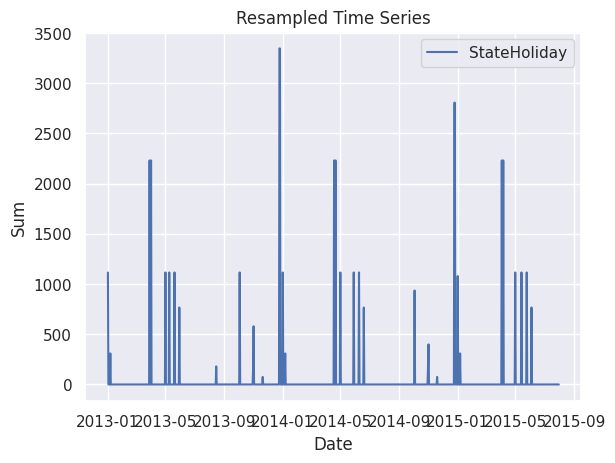

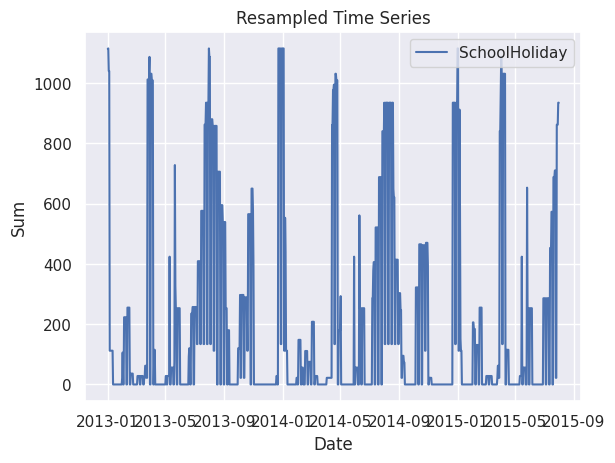

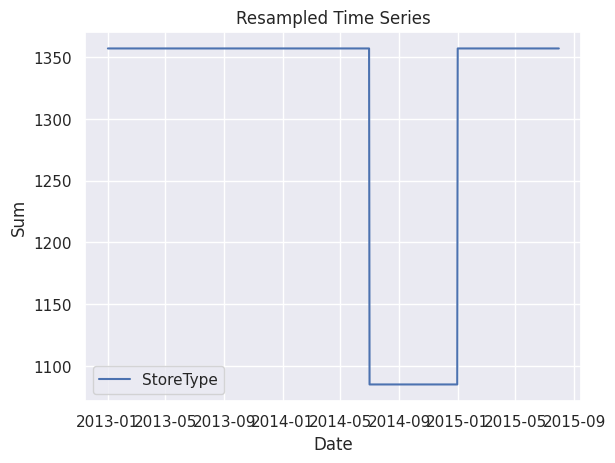

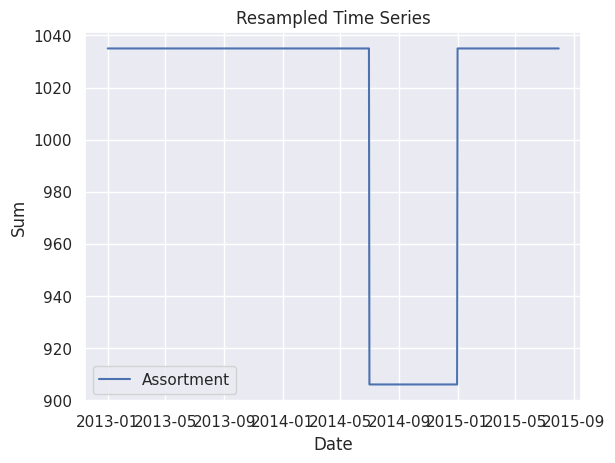

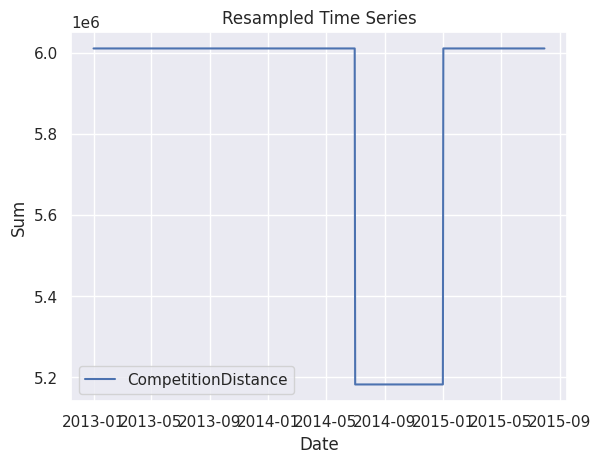

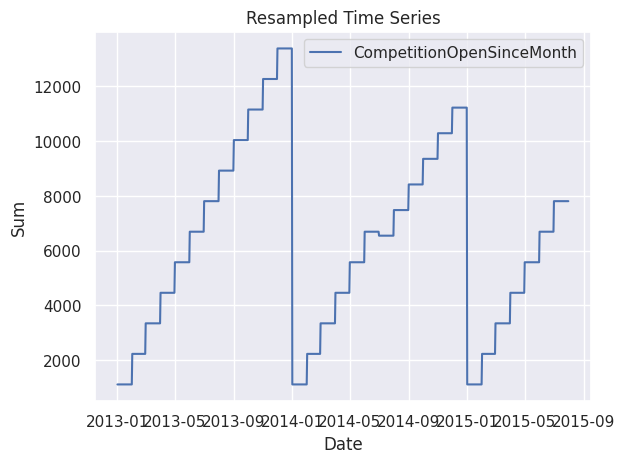

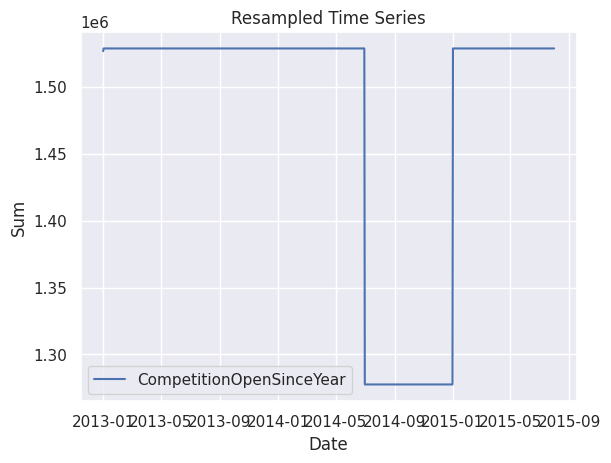

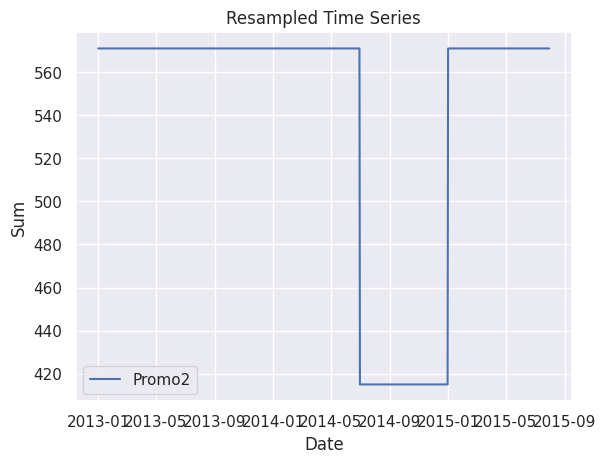

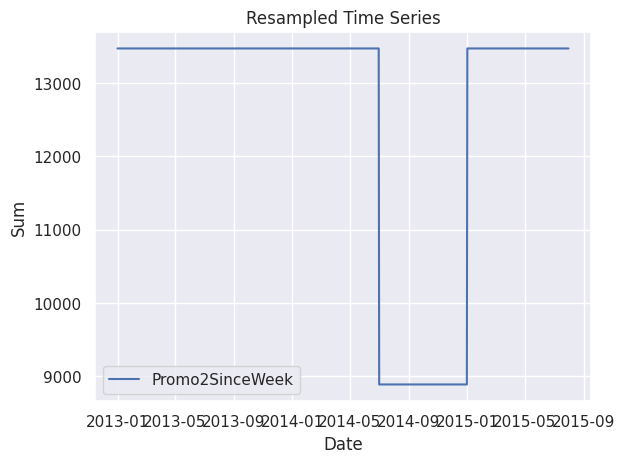

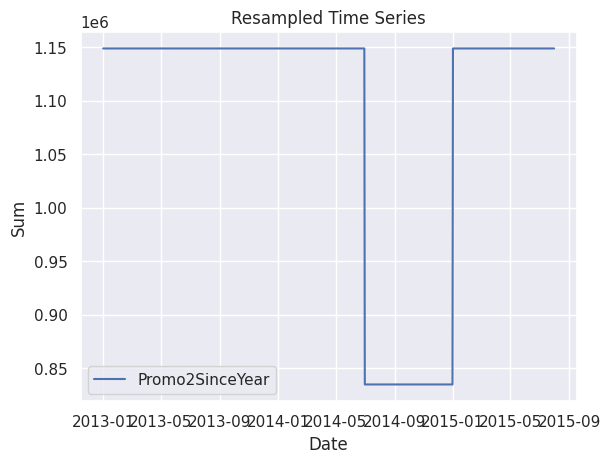

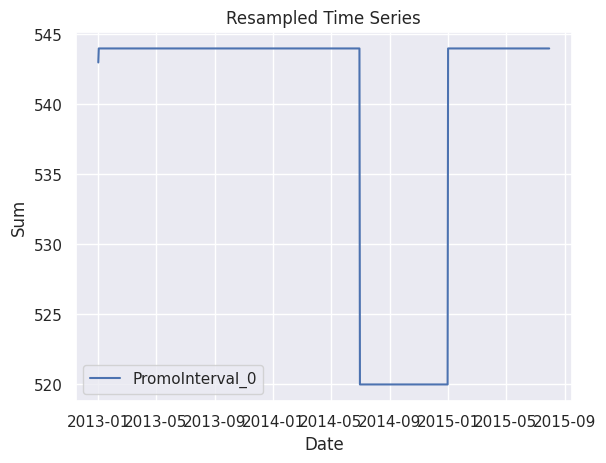

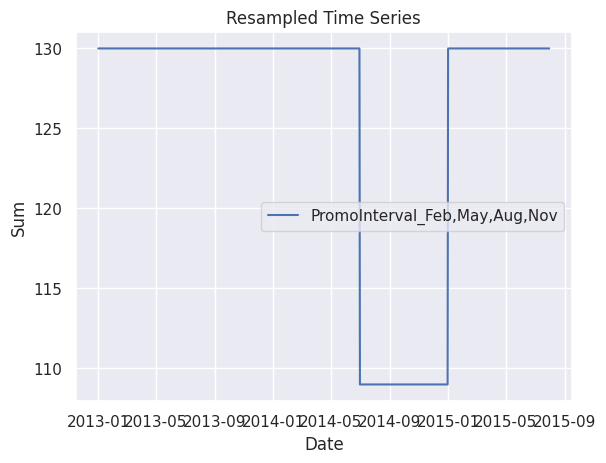

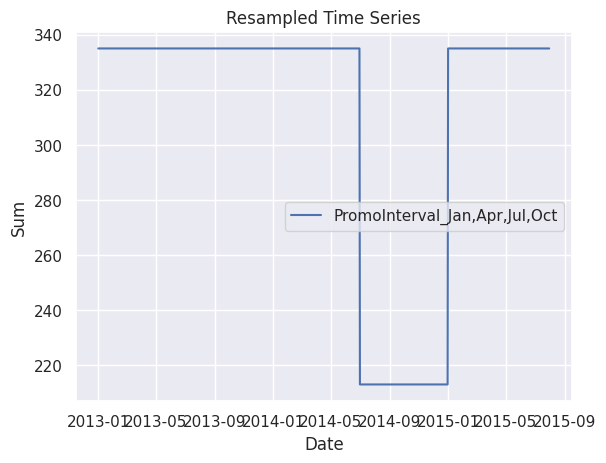

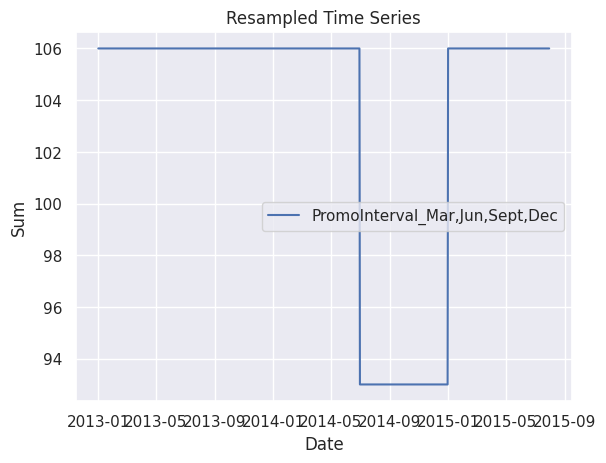

In [43]:
#convert the index to datetime format
train_score.index = pd.to_datetime(train_score.index)

#selecting only numeric columns for summation
numeric_columns = train_score.select_dtypes(include=['number']).columns

#resampling the data
train_data_resampled = train_score[numeric_columns].resample('D').sum()

#Plot the Time Series
plt.figure(figsize=(10,6))
for column in numeric_columns:
  plt.plot(train_data_resampled.index,train_data_resampled[column],label=column)
  plt.xlabel('Date')
  plt.ylabel('Sum')
  plt.title('Resampled Time Series')
  plt.legend()
  plt.show()

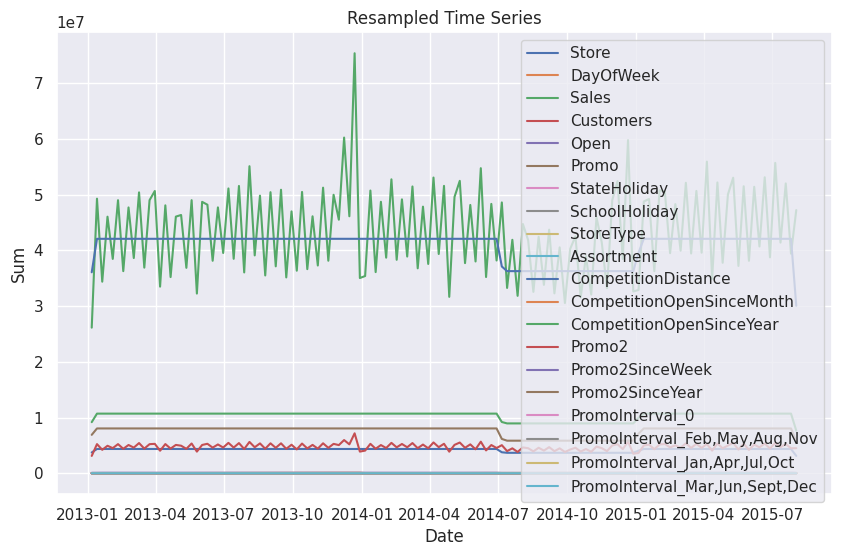

In [44]:
#Resampling the data at a lower frequency(weekly)
resample_frequency = 'w' # Adjust this frequency as needed
train_data_resampled = train_score[numeric_columns].resample(resample_frequency).sum()

#Plot the time series
plt.figure(figsize=(10,6))
for column in numeric_columns:
  plt.plot(train_data_resampled.index,train_data_resampled[column],label=column)
plt.xlabel('Date')
plt.ylabel('Sum')
plt.title('Resampled Time Series')
plt.legend()
plt.show()

In [45]:
#Resampling the data to a frequency and calculating mean
columns_to_resample = ['Sales','Customers']
train_data_weekly_mean = train_score[columns_to_resample].resample('w').mean()
print(train_data_weekly_mean)

                  Sales   Customers
Date                               
2013-01-06  3906.314098  465.032441
2013-01-13  6313.289174  669.615631
2013-01-20  4404.582319  538.852402
2013-01-27  5898.804484  631.496861
2013-02-03  4928.382960  577.533632
...                 ...         ...
2015-07-05  7135.231390  695.328764
2015-07-12  5303.175144  599.558360
2015-07-19  6663.474568  672.192441
2015-07-26  5048.317104  573.547085
2015-08-02  8471.914439  807.577578

[135 rows x 2 columns]


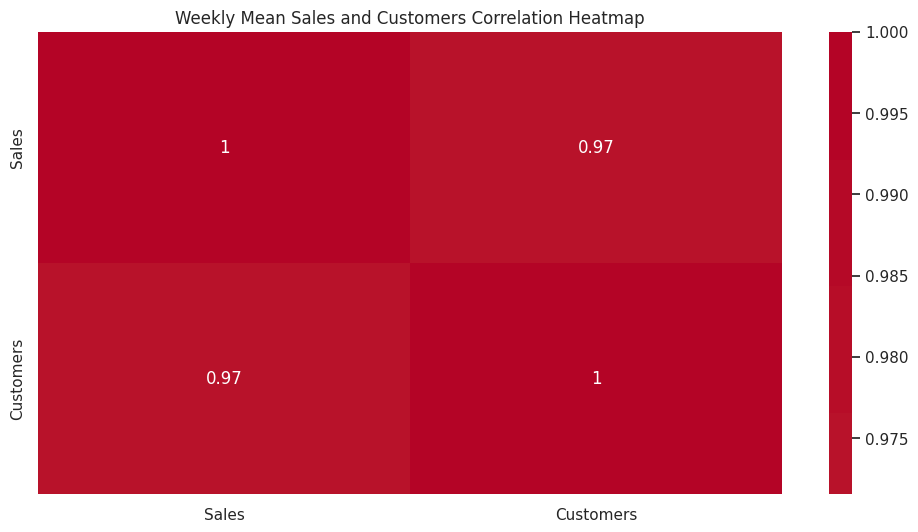

In [46]:
#Resampling the data to a frequency and calculating mean
columns_to_resample = ['Sales','Customers']
train_data_weekly_mean = train_score[columns_to_resample].resample('w').mean()

#heatmap
plt.figure(figsize=(12,6))
heatmap = sns.heatmap(train_data_weekly_mean.corr(),annot=True,cmap='coolwarm',center=0)
heatmap.set_title('Weekly Mean Sales and Customers Correlation Heatmap')
plt.show()

# Calculating rolling standard deviation

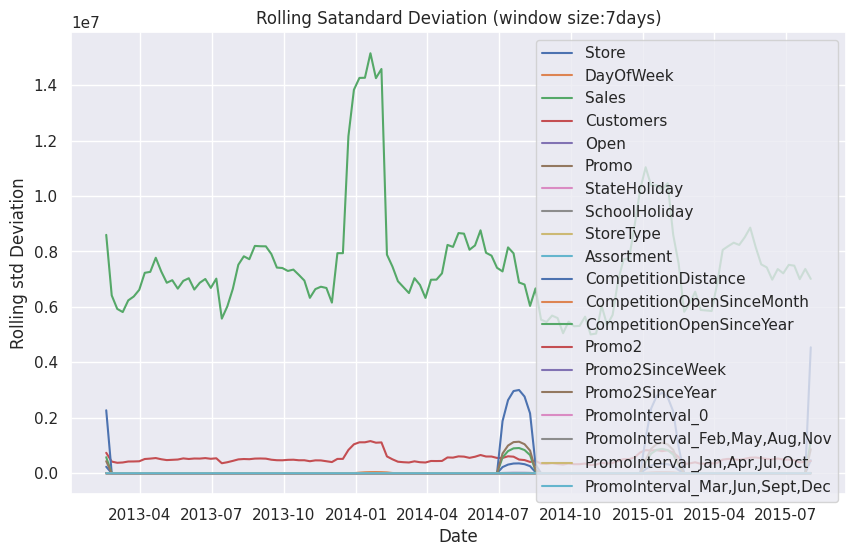

In [47]:
window_size = 7
rolling_std = train_data_resampled.rolling(window=window_size).std()

#Plotting the rolling standard deviation
plt.figure(figsize=(10,6))
for column in numeric_columns:
  plt.plot(rolling_std.index,rolling_std[column],label=column)
plt.xlabel('Date')
plt.ylabel('Rolling std Deviation')
plt.title(f'Rolling Satandard Deviation (window size:{window_size}days)')
plt.legend()
plt.show()

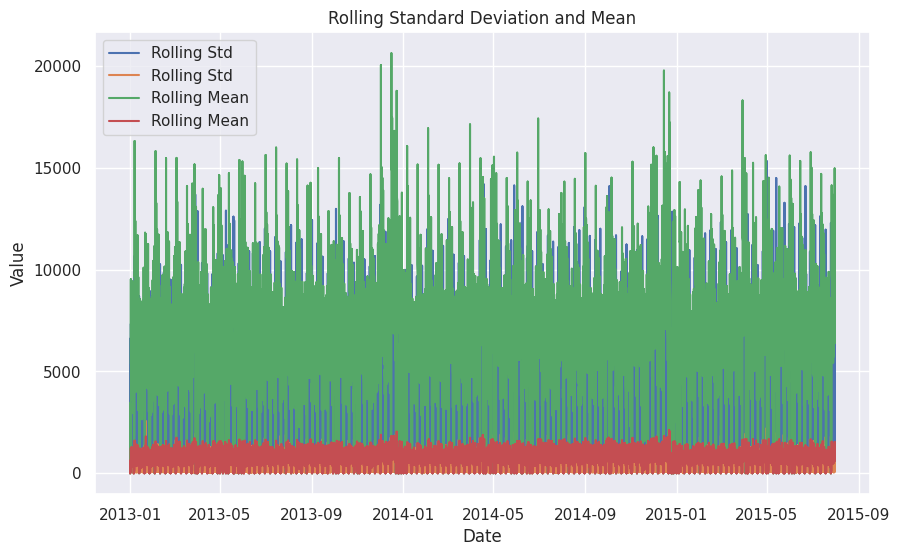

In [48]:
# Columns to calculate rolling statistics
columns_to_calculate = ['Sales','Customers']

#calculating rolling standard deviation and mean with a window size = 7 days
rolling_std = train_score[columns_to_calculate].rolling(window=7).std()
rolling_mean = train_score[columns_to_calculate].rolling(window=7).mean()

#Plotting the rolling statistics
plt.figure(figsize=(10,6))
plt.plot(rolling_std,label='Rolling Std')
plt.plot(rolling_mean,label='Rolling Mean')
plt.title('Rolling Standard Deviation and Mean')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [49]:
#Descriptive statistics of rolling standard deviation and mean
print('Rolling Standard Deviation:')
print(rolling_std.describe())

print('\nRolling Mean:')
print(rolling_mean.describe())

Rolling Standard Deviation:
              Sales     Customers
count  1.017203e+06  1.017203e+06
mean   2.118392e+03  2.840919e+02
std    1.466903e+03  2.317120e+02
min    0.000000e+00  0.000000e+00
25%    1.282215e+03  1.538753e+02
50%    1.961211e+03  2.414316e+02
75%    2.807564e+03  3.630961e+02
max    1.534793e+04  2.551930e+03

Rolling Mean:
              Sales     Customers
count  1.017203e+06  1.017203e+06
mean   5.773829e+03  6.331475e+02
std    3.021751e+03  3.169847e+02
min    0.000000e+00  0.000000e+00
25%    4.868143e+03  5.517143e+02
50%    6.162429e+03  6.900000e+02
75%    7.608571e+03  8.240000e+02
max    2.063857e+04  2.115571e+03


# Seasonality Plot

In [50]:
import statsmodels.api as sm

first differencing

In [51]:
#Resample to weekly frequency and calculate mean sales
weekly_sales = train_score['Sales'].resample('w').mean()

In [52]:
#calculate first difference
diff_series = weekly_sales.diff(periods=1).dropna()

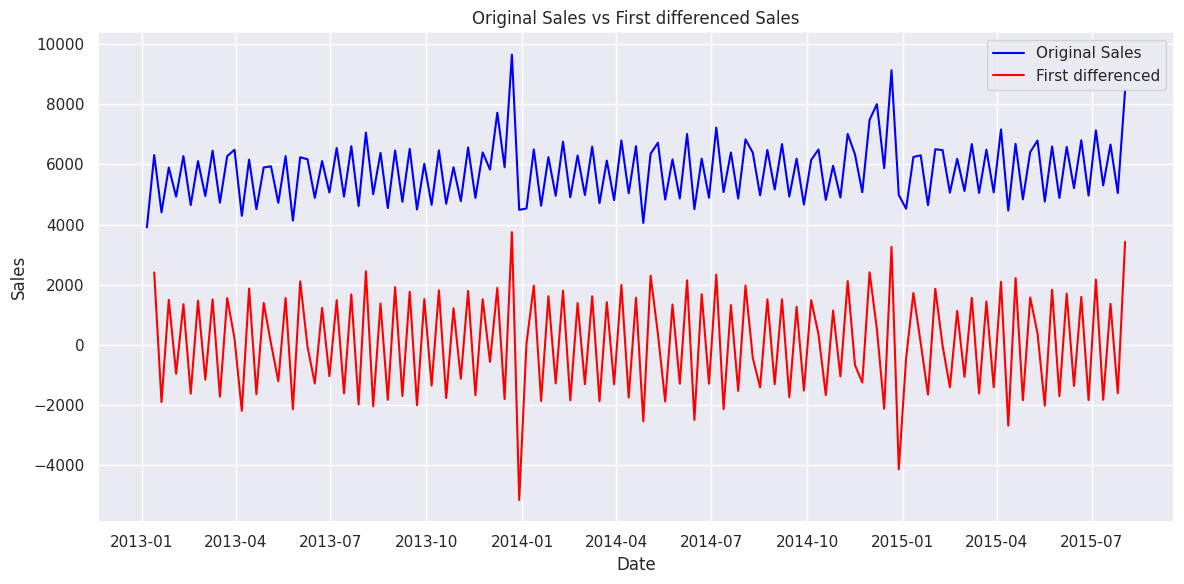

In [53]:
#Create a singal plot
plt.figure(figsize=(12,6))

#Original time series
plt.plot(weekly_sales,label='Original Sales',color = 'blue')

#First differenced series
plt.plot(diff_series,label='First differenced',color = 'red')

plt.title('Original Sales vs First differenced Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()

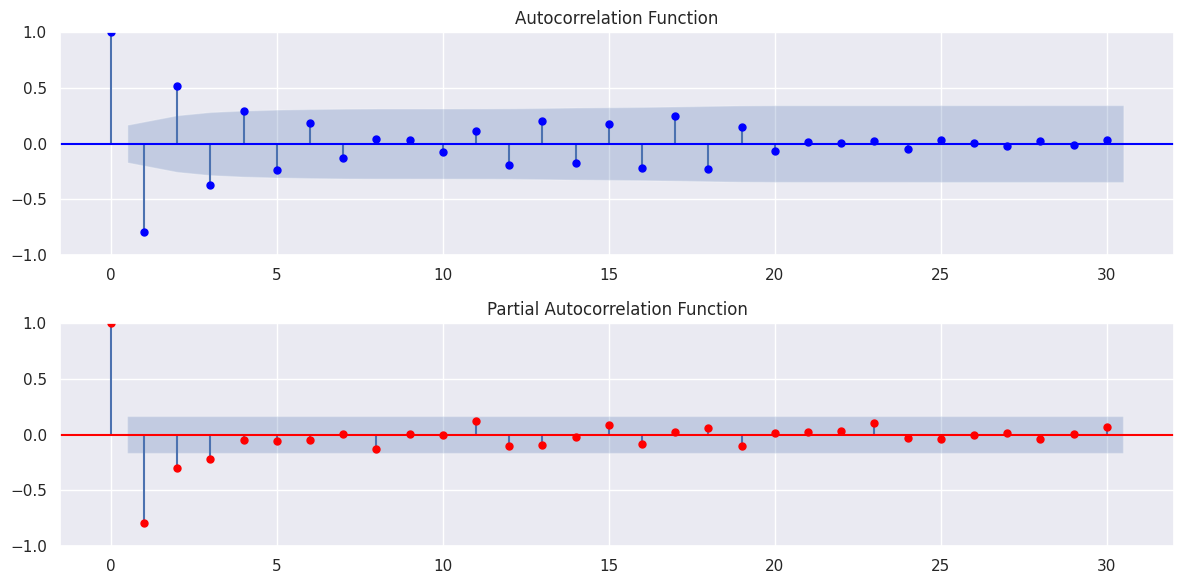

In [54]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

#create a single plot for ACF and PACF with colors
plt.figure(figsize=(12,6))

#ACF plot with color
plt.subplot(2,1,1)
plot_acf(diff_series,lags=30,ax=plt.gca(),title='Autocorrelation Function',color='blue')

#PACF plot with color
plt.subplot(2,1,2)
plot_pacf(diff_series,lags=30,ax=plt.gca(),title='Partial Autocorrelation Function',color='red')

plt.tight_layout()
plt.show()

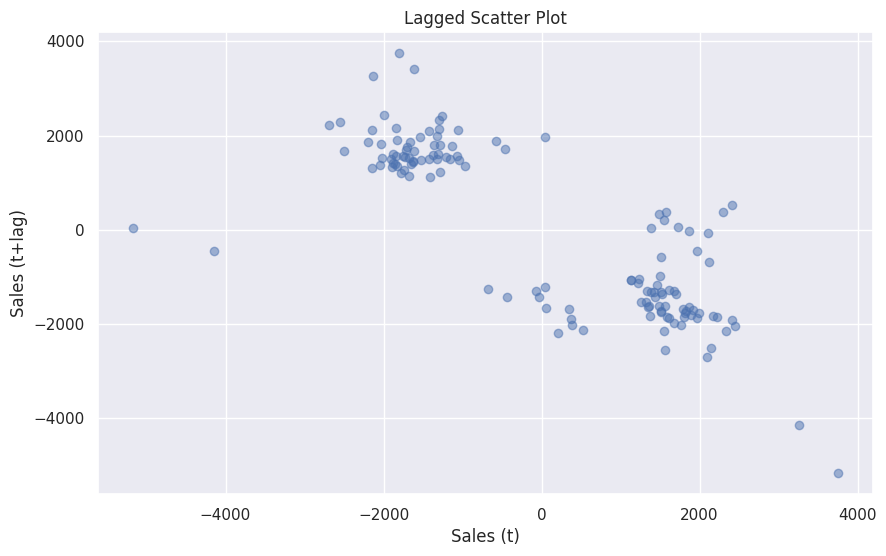

In [55]:
#create a lagged scatter plot
plt.figure(figsize=(10,6))
lagged_sales = pd.concat([diff_series,diff_series.shift(-1)],axis=1)
lagged_sales.columns = ['Sales','Lagged Sales']
plt.scatter(lagged_sales['Sales'],lagged_sales['Lagged Sales'],alpha=0.5)
plt.title('Lagged Scatter Plot')
plt.xlabel('Sales (t)')
plt.ylabel('Sales (t+lag)')
plt.show()

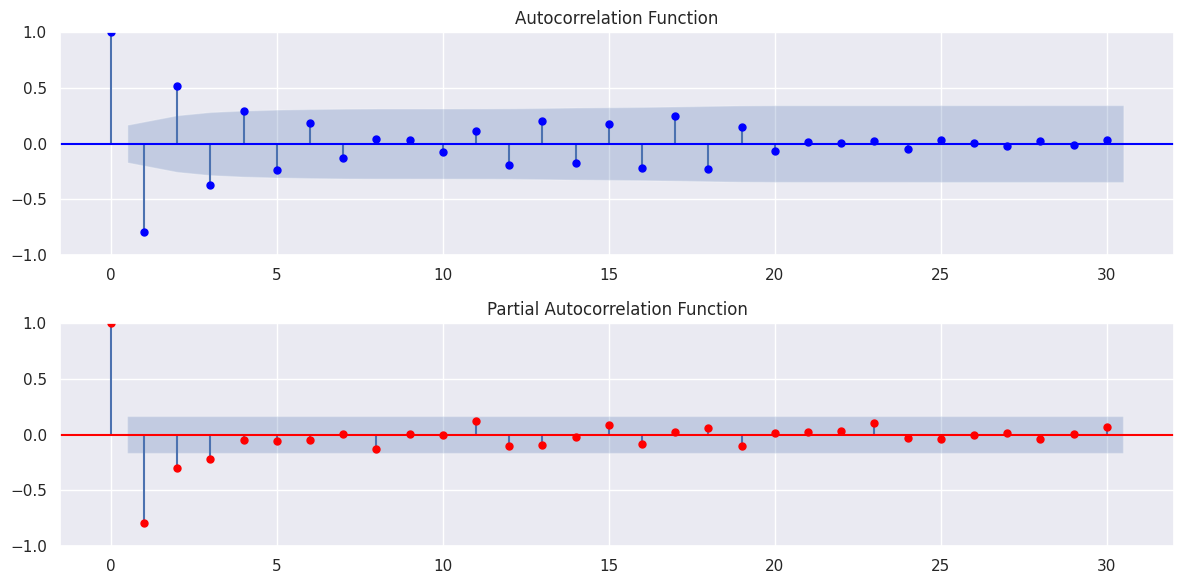

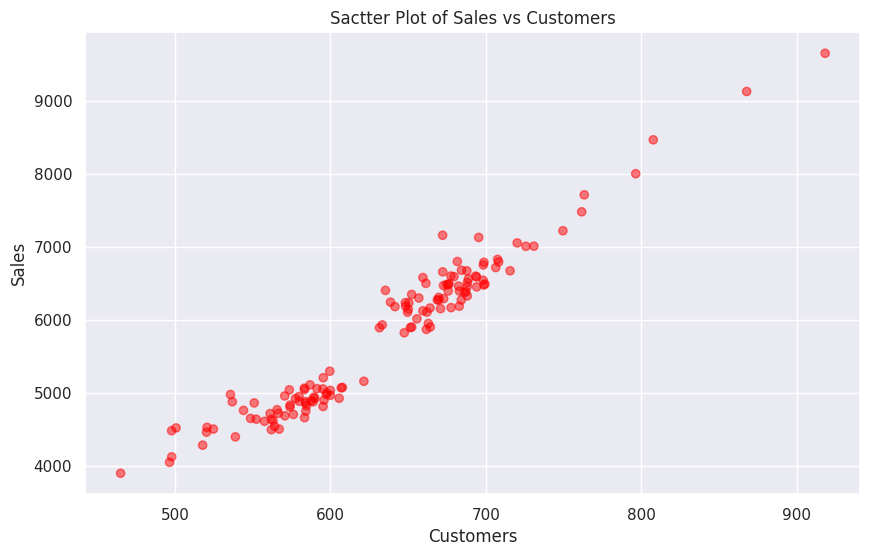

In [56]:
#Resample to weekly frequency and calculate mean Sales ,Customers and Promo
weekly_data = train_score.resample('w').agg({
    'Sales': 'mean',
     'Customers':'mean',
     'Promo': 'sum'   #Assuming Promo is a binary value (0 or 1)
})
#calculate first difference
diff_series = weekly_data['Sales'].diff(periods=1).dropna()

#create a single plot for ACF and PACF with colors
plt.figure(figsize=(12,6))

#ACF plot with color
plt.subplot(2,1,1)
plot_acf(diff_series,lags=30,ax=plt.gca(),title='Autocorrelation Function',color='blue')

#PACF plot with color
plt.subplot(2,1,2)
plot_pacf(diff_series,lags=30,ax=plt.gca(),title='Partial Autocorrelation Function',color='red')

plt.tight_layout()
plt.show()

#create a scatter plot of sales vs customers with color by Promo
plt.figure(figsize=(10,6))
colors = ['blue' if promo==1 else 'red' for promo in weekly_data['Promo']]
plt.scatter(weekly_data['Customers'],weekly_data['Sales'],c=colors,alpha=0.5)
plt.title('Sactter Plot of Sales vs Customers')
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

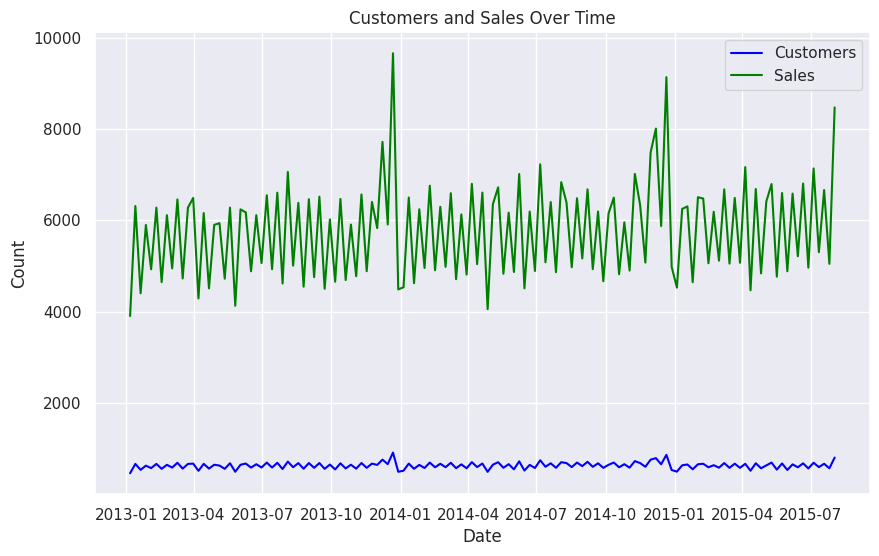

In [57]:
plt.figure(figsize=(10,6))
plt.plot(weekly_data['Customers'],label='Customers',color='blue')
plt.plot(weekly_data['Sales'],label='Sales',color='green')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Customers and Sales Over Time')
plt.legend()
plt.show()

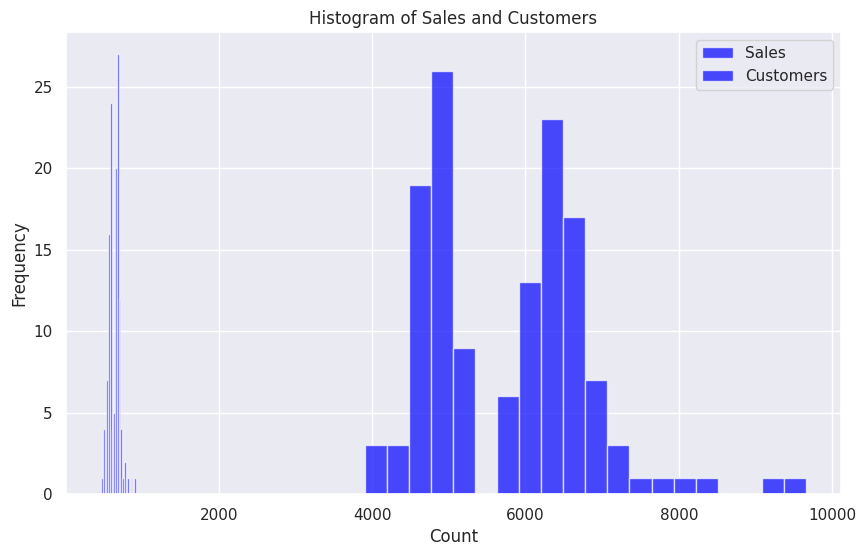

In [58]:
plt.figure(figsize=(10,6))
plt.hist(weekly_data['Sales'],bins=20,alpha=0.7,color='blue',label='Sales')
plt.hist(weekly_data['Customers'],bins=20,alpha=0.7,color='blue',label='Customers')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Histogram of Sales and Customers')
plt.legend()
plt.show()

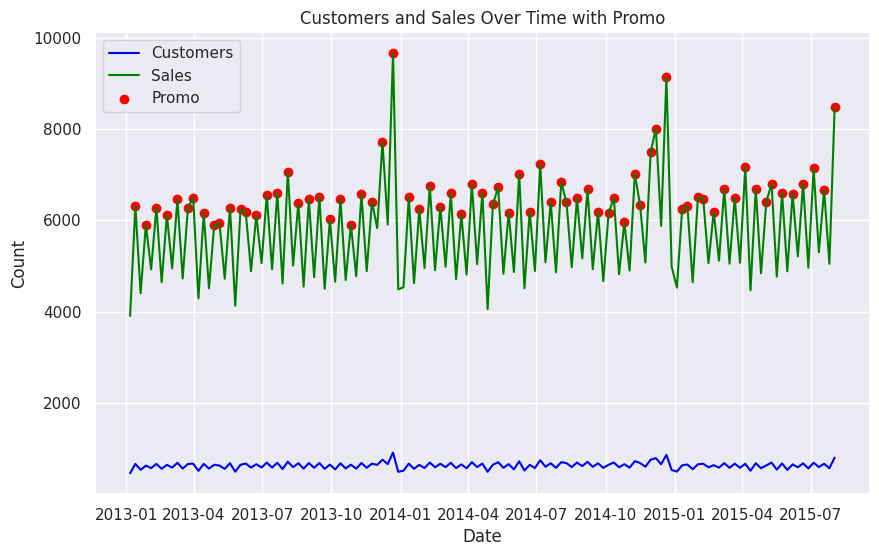

In [59]:
plt.figure(figsize=(10,6))
plt.plot(weekly_data['Customers'],label='Customers',color='blue')
plt.plot(weekly_data['Sales'],label='Sales',color='green')
promo_indices = weekly_data[weekly_data['Promo']>0].index
plt.scatter(promo_indices,weekly_data.loc[promo_indices,'Sales'],color='red',label='Promo')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Customers and Sales Over Time with Promo')
plt.legend()
plt.show()

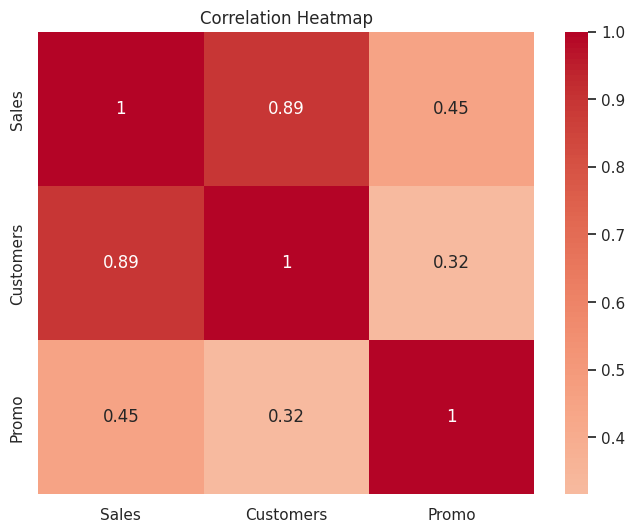

In [60]:
selected_columns=['Sales','Customers','Promo']
selected_data = train_score[selected_columns]

#calculate the correlation matrix
correlation_matrix = selected_data.corr()

#create a heatmap of the correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',center=0)
plt.title("Correlation Heatmap")
plt.show()

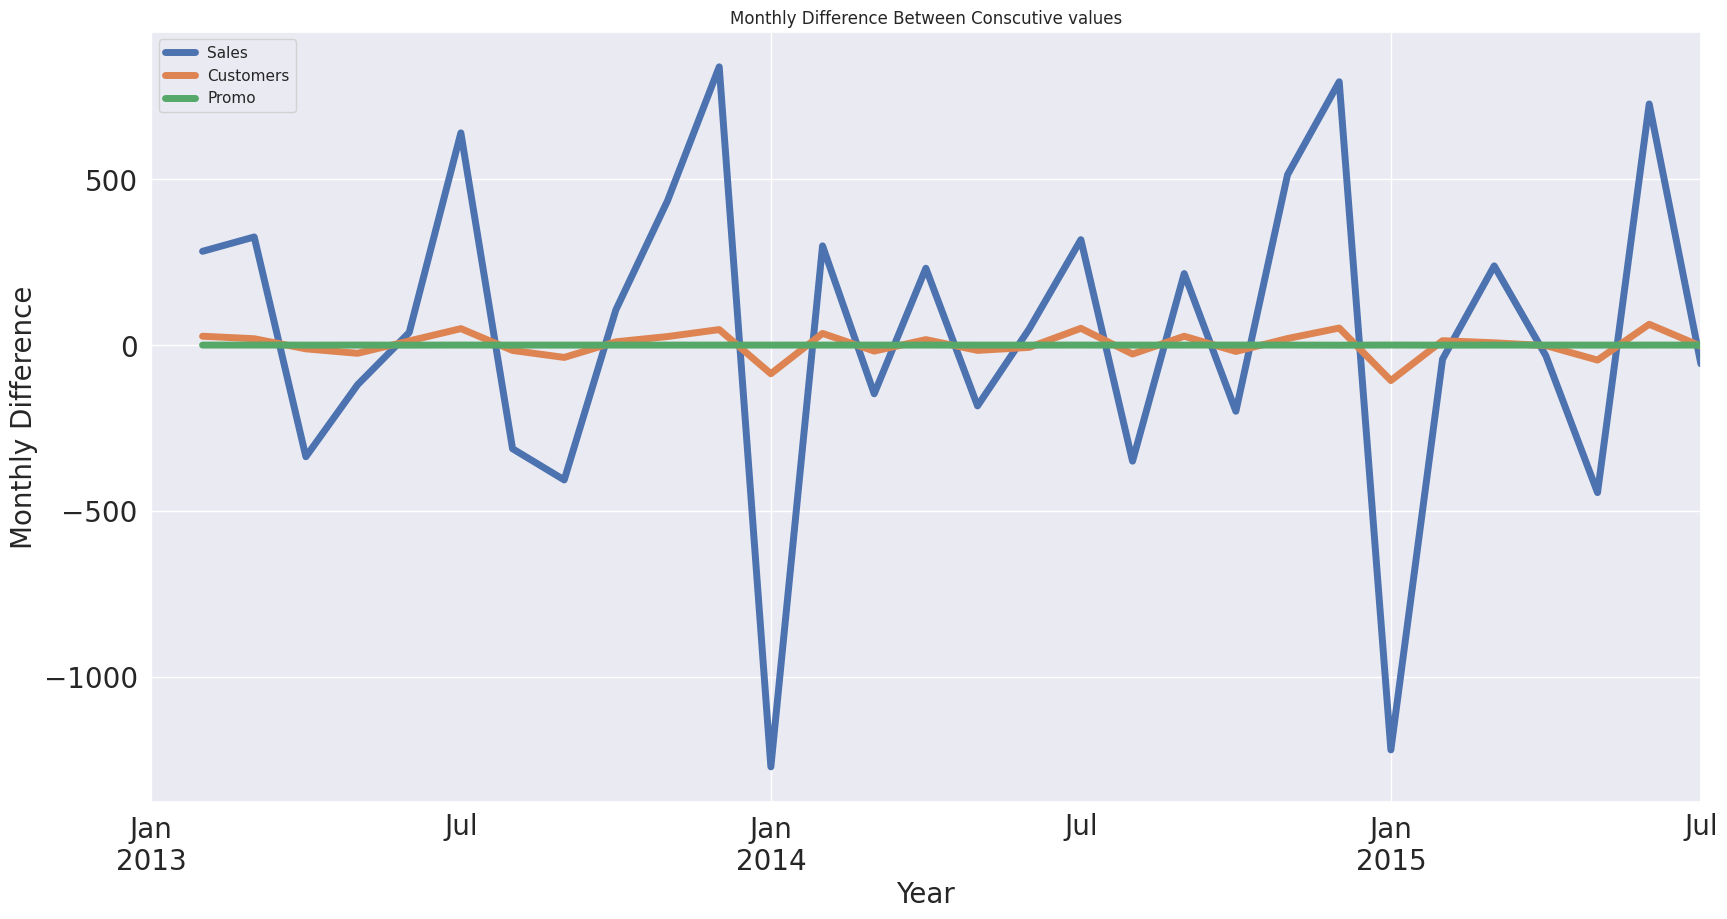

In [61]:
#selected the columns you want to analyse
selected_columns=['Sales','Customers','Promo']

#Resample the data to monthly frequency
monthly_data = train_score[selected_columns].resample('M').mean()

#Calculate the difference between consecutive monthly value
monthly_diff_data = monthly_data.diff()

#Plot the difference
monthly_diff_data.plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Monthly Difference',fontsize=20)
plt.title('Monthly Difference Between Conscutive values')
plt.show()

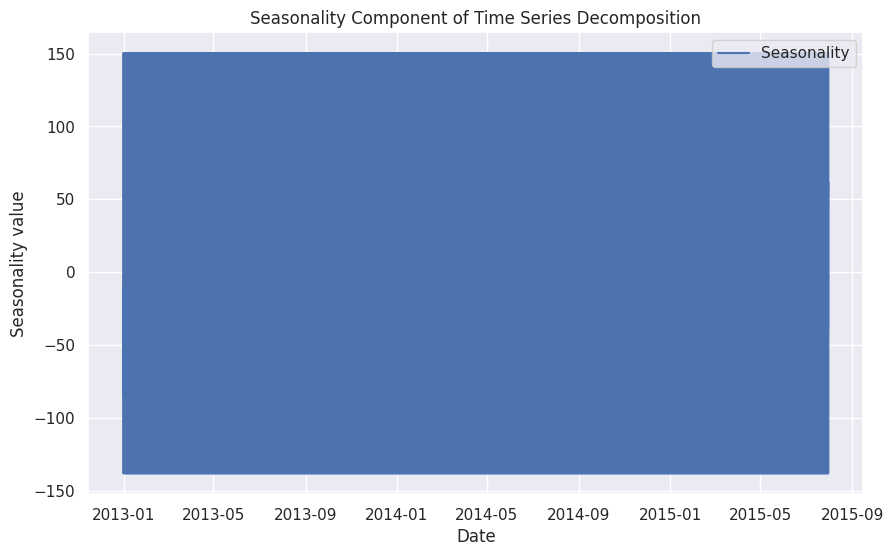

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose

#Performing time series decomposition on the Sales column with yearly frequency
decomposition_result = seasonal_decompose(train_score['Sales'],model='Additive',period=365)
seasonality_data = decomposition_result.seasonal

#create a time index for the x-axis (assuming 'Date' is your index)
time_index = seasonality_data.index

#plot the seasonality component
plt.figure(figsize=(10,6))
plt.plot(time_index,seasonality_data,label='Seasonality')
plt.xlabel('Date')
plt.ylabel('Seasonality value')
plt.title('Seasonality Component of Time Series Decomposition')
plt.legend()
plt.show()

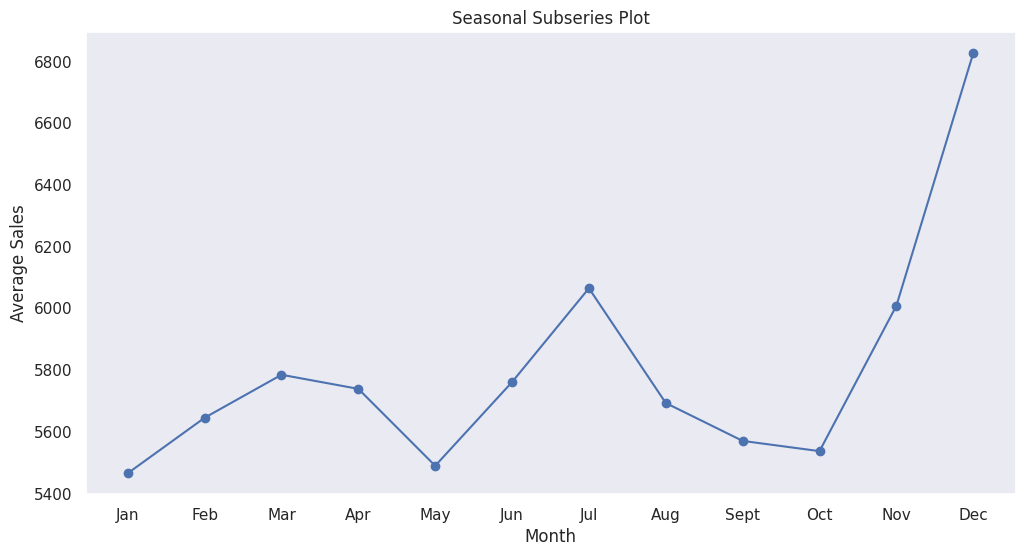

In [66]:
#seasonal Subseries plot
train_score.index = pd.to_datetime(train_score.index)

#Grouping the data by month and calculating the mean for each month
monthly_mean = train_score['Sales'].groupby(train_score.index.month).mean()

#plot the seasonality component
plt.figure(figsize=(12,6))
monthly_mean.plot(marker='o')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(range(1,13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])
plt.title('Seasonal Subseries Plot')
plt.grid()
plt.show()

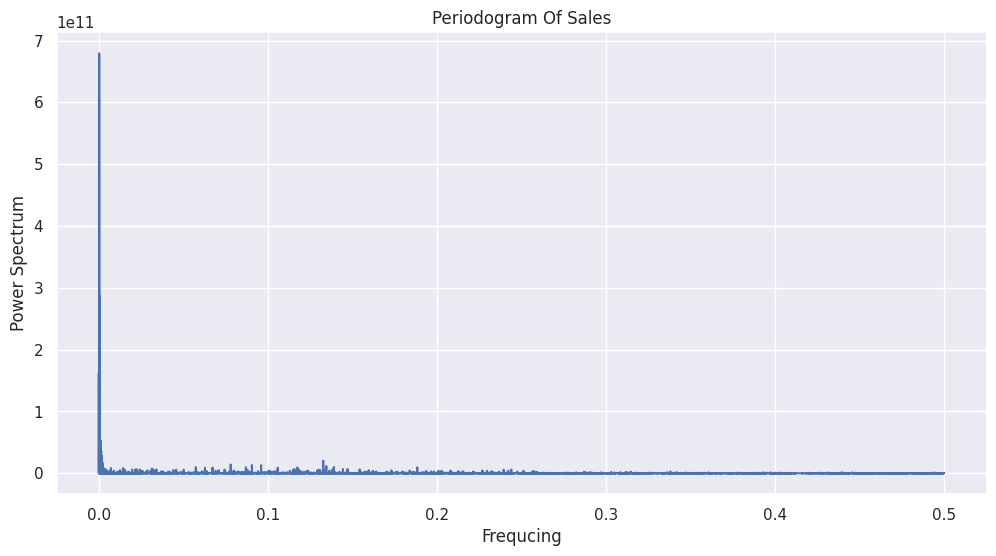

In [67]:
#Periodogram
from scipy.signal import periodogram

#computing the periodogram of the time series
frequcing,power_spectrum = periodogram(train_score['Sales'])

#plotting the periodogram
plt.figure(figsize=(12,6))
plt.plot(frequcing,power_spectrum)
plt.xlabel('Frequcing')
plt.ylabel('Power Spectrum')
plt.title('Periodogram Of Sales')
plt.show()

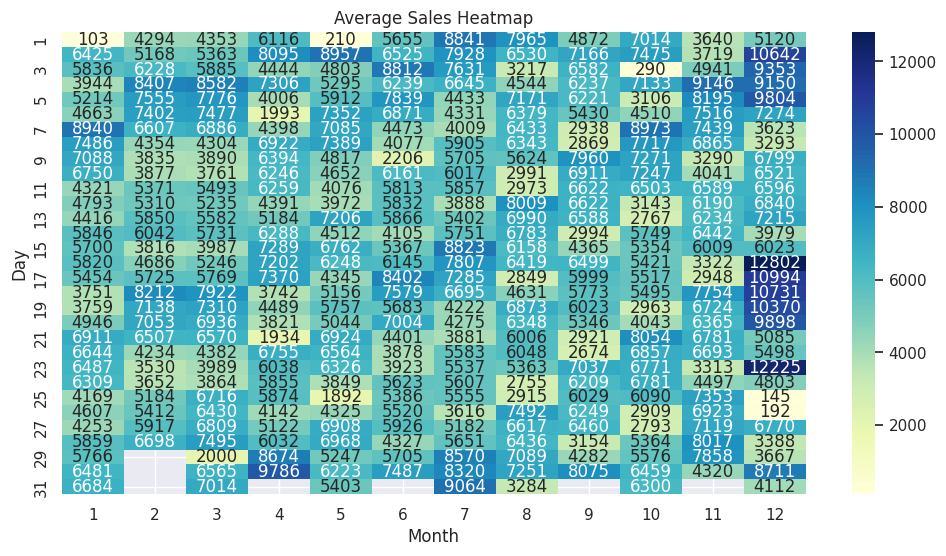

In [68]:
#Heatmap
import numpy as np

#heatmap of average sales across days and month
heatmap_data = train_score.pivot_table(values='Sales',index=train_score.index.day,columns=train_score.index.month,aggfunc=np.mean)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data,cmap='YlGnBu',annot=True,fmt='.0f')
plt.title('Average Sales Heatmap')
plt.xlabel('Month')
plt.ylabel('Day')
plt.show()

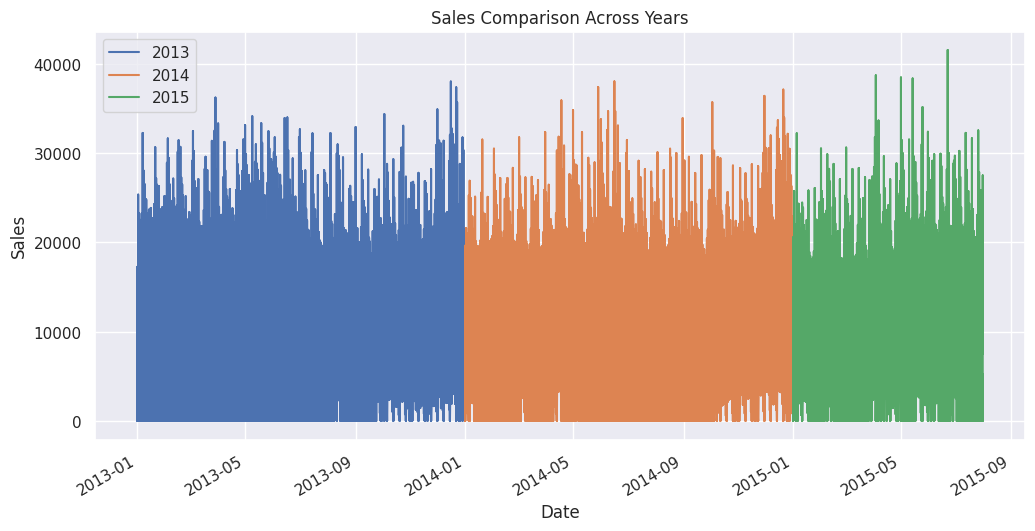

In [70]:
#Filtering data for each year
sales_2013 = train_score[train_score.index.year==2013]['Sales']
sales_2014 = train_score[train_score.index.year==2014]['Sales']
sales_2015 = train_score[train_score.index.year==2015]['Sales']

#plotting comparison across years
plt.figure(figsize=(12,6))
sales_2013.plot(label='2013')
sales_2014.plot(label='2014')
sales_2015.plot(label='2015')
plt.title('Sales Comparison Across Years')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Stationarity Check

In [71]:
from statsmodels.tsa.stattools import adfuller

In [72]:
#Date is index and Sales is target variable
time_series = train_score['Sales']

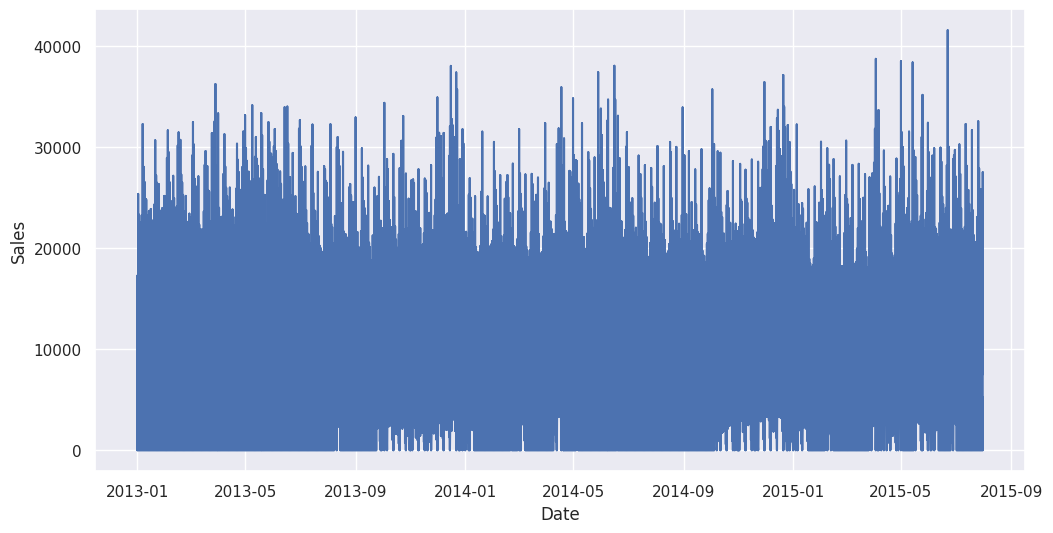

In [73]:
#visualizing the time series data
plt.figure(figsize=(12,6))
plt.plot(train_score['Sales'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

#Cyclicality

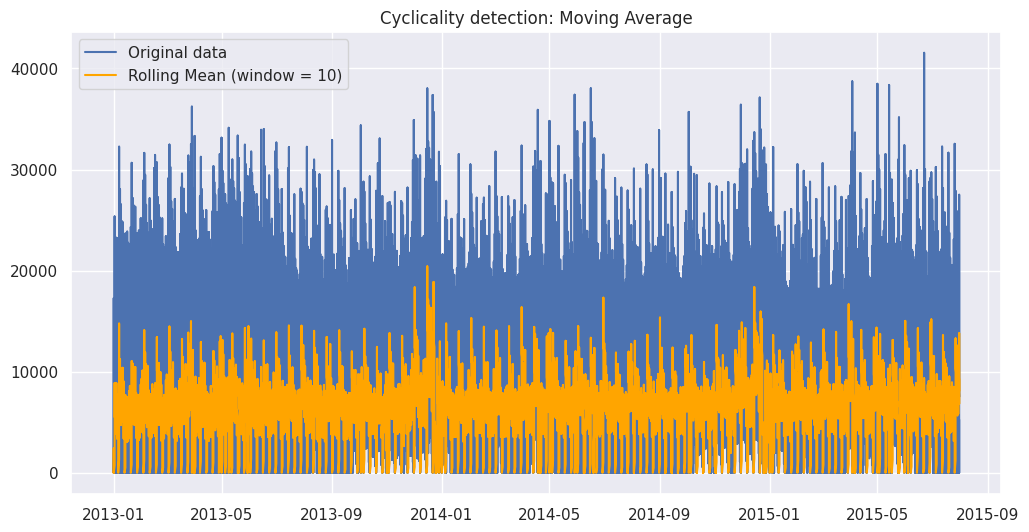

In [74]:
#Calculate rolling mean with a window size of your choice
window_size =10
rolling_mean = train_score['Sales'].rolling(window=window_size).mean()

#Plot the original data and rolling mean
plt.figure(figsize=(12,6))
plt.plot(train_score['Sales'],label='Original data')
plt.plot(rolling_mean,label=f'Rolling Mean (window = {window_size})',color='orange')
plt.title('Cyclicality detection: Moving Average')
plt.legend()
plt.show()

# ARIMA

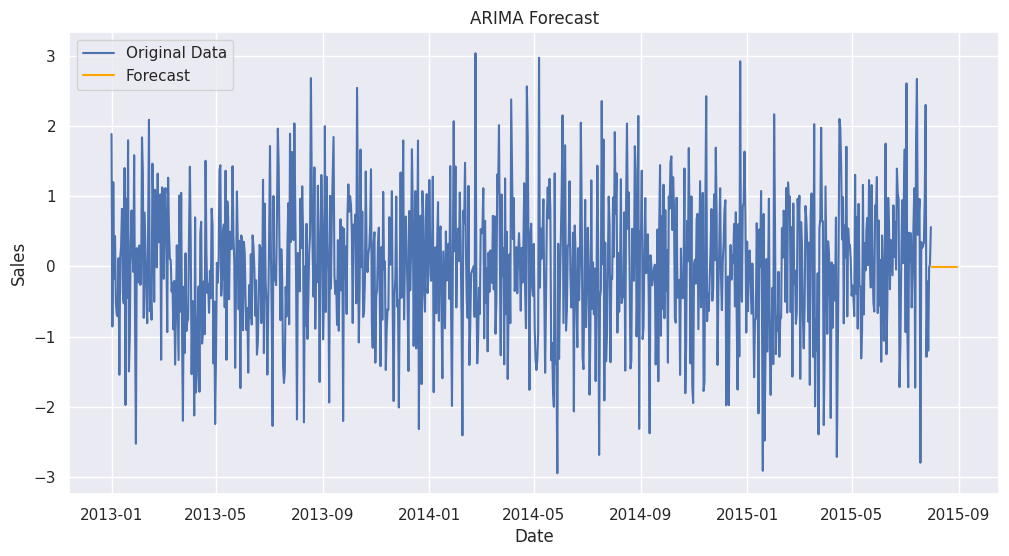

In [78]:
from statsmodels.tsa.arima.model import ARIMA

time_series_data = train_score['Sales']

min_date = pd.to_datetime('2013-01-01')
max_date = pd.to_datetime('2015-07-31')
date_rng = pd.date_range(start = min_date,end=max_date,freq='D')
time_series_data = pd.Series(np.random.randn(len(date_rng)),index=date_rng)

#Fit ARIMA model
model = ARIMA(time_series_data,order=(1,0,0))
model_fit=model.fit()

#Make prediction for the next 30 days
forecast = model_fit.forecast(steps=30)

#Plot the original time series and the forecast

plt.figure(figsize=(12,6))
plt.plot(time_series_data,label='Original Data')
plt.plot(forecast,label='Forecast',color='orange')
plt.legend()
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [79]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.7 MB/s eta 0:00:00


# Exponential Smoothing

In [80]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


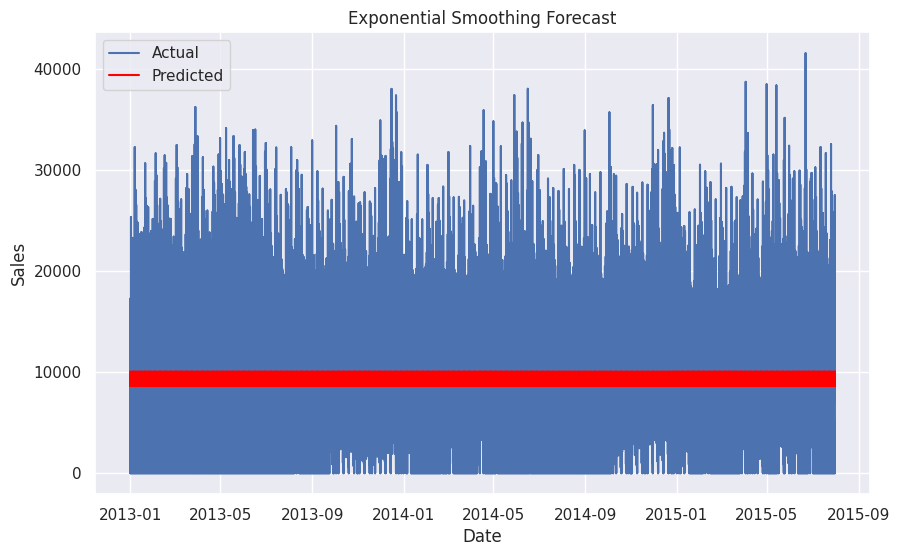

In [82]:
time_series = train_score['Sales']

#Apply Exponential Smoothing
model=ExponentialSmoothing(time_series,seasonal='add',seasonal_periods=7)
model_fit=model.fit()

#Make predictions
predictions = model_fit.predict(start=len(time_series),end=len(time_series)+len(train_score)-1)

#Plot actual vs predicted values
plt.figure(figsize=(10,6))
plt.plot(time_series,label='Actual')
plt.plot(train_score.index,predictions,color='red',label='Predicted')
plt.legend()
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWa

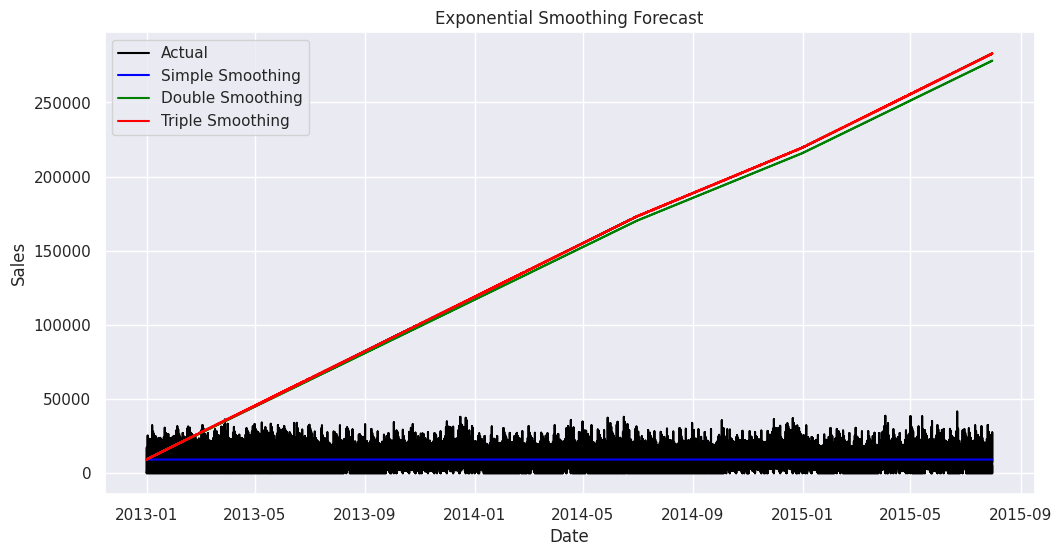

In [86]:
#Simple Exponential Smoothing
model_simple = ExponentialSmoothing(time_series,trend=None,seasonal=None)
model_fit_simple=model_simple.fit()
predictions_simple = model_fit_simple.predict(start=len(time_series),end=len(time_series)+len(train_score)-1)

#Double Exponential Smoothing(Holt's method)
model_double = ExponentialSmoothing(time_series,trend='add',seasonal=None)
model_fit_double =model_double.fit()
predictions_double = model_fit_double.predict(start=len(time_series),end=len(time_series)+len(train_score)-1)

#Triple Exponential Smoothing(Holt-winters Method)
model_triple = ExponentialSmoothing(time_series,trend='add',seasonal='add',seasonal_periods=7)
model_fit_triple=model_triple.fit()
predictions_triple = model_fit_triple.predict(start=len(time_series),end=len(time_series)+len(train_score)-1)

#Plot actual vs predicted values for all methods
plt.figure(figsize=(12,6))
plt.plot(time_series,label='Actual',color='black')
plt.plot(train_score.index,predictions_simple,label='Simple Smoothing',color='blue')
plt.plot(train_score.index,predictions_double,label='Double Smoothing',color='green')
plt.plot(train_score.index,predictions_triple,label='Triple Smoothing',color='red')
plt.legend()
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()